# Import and EDA

In [52]:
#Dataframe
import pandas as pd
from datetime import datetime as dt
import numpy as np
import pytz
import itertools

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns


#Modeling
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df=pd.read_csv('Data\Supply_Chain_Shipment_Pricing_Data.csv')

In [3]:
df.head()

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10324 non-null  int64  
 1   project code                  10324 non-null  object 
 2   pq #                          10324 non-null  object 
 3   po / so #                     10324 non-null  object 
 4   asn/dn #                      10324 non-null  object 
 5   country                       10324 non-null  object 
 6   managed by                    10324 non-null  object 
 7   fulfill via                   10324 non-null  object 
 8   vendor inco term              10324 non-null  object 
 9   shipment mode                 9964 non-null   object 
 10  pq first sent to client date  10324 non-null  object 
 11  po sent to vendor date        10324 non-null  object 
 12  scheduled delivery date       10324 non-null  object 
 13  d

In [5]:
df['country'].value_counts()

South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Pakistan                15
Guatemala               15
Malawi                  14
Benin                   13
Libya                    8
Lebanon                  8
Angola                   7
Liberia                  6
Sierra Leone             4
Lesotho                  4
Senegal                  3
Togo                     3
A

In [6]:
df['shipment mode'].value_counts()

Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: shipment mode, dtype: int64

# Data Cleaning

### Dropping Columns

In [7]:
df.drop(columns=[
    'pq #',
    'po / so #',
    'asn/dn #', 
    'pq first sent to client date', 
    'po sent to vendor date', 
    'line item insurance (usd)', 
    'id',
    'project code',
    'managed by',
    'fulfill via',
    'vendor inco term',
    'shipment mode',
    'delivery recorded date',
    'molecule/test type',
    'brand',
    'dosage',
    'dosage form',
    'unit of measure (per pack)',
    'pack price',
    'unit price',
    'manufacturing site',
    'first line designation',
    'weight (kilograms)',
    'freight cost (usd)'], inplace=True)

## Dropping Rows

Dropping countries with less than 100 instances

In [8]:
df = df[df['country'].map(df['country'].value_counts()) >= 50]

In [9]:
df['country'].value_counts() #SANITY CHECK

South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Name: country, dtype: int64

In [10]:
df.info() #SANITY CHECK

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10115 entries, 0 to 10323
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   10115 non-null  object 
 1   scheduled delivery date   10115 non-null  object 
 2   delivered to client date  10115 non-null  object 
 3   product group             10115 non-null  object 
 4   sub classification        10115 non-null  object 
 5   vendor                    10115 non-null  object 
 6   item description          10115 non-null  object 
 7   line item quantity        10115 non-null  int64  
 8   line item value           10115 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 790.2+ KB


In [11]:
df.head()

,country,scheduled delivery date,delivered to client date,product group,sub classification,vendor,item description,line item quantity,line item value
0,Côte d'Ivoire,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...",19,551.0
1,Vietnam,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",1000,6200.0
2,Côte d'Ivoire,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests",500,40000.0
3,Vietnam,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",31920,127360.8
4,Vietnam,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",38000,121600.0


In [12]:
df['vendor'].value_counts()

SCMS from RDC                                      5334
S. BUYS WHOLESALER                                  715
Orgenics, Ltd                                       691
Aurobindo Pharma Limited                            665
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)     345
                                                   ... 
CENTRAL PHARMACEUTICAL COMPANY NO. 1                  1
SETEMA LIMITED PLC                                    1
AHN (PTY) LTD (AKA UCB (S.A.)                         1
RAININ INSTRUMENT, LLC.                               1
BIO-RAD LABORATORIES PTY LTD. (SOUTH AFRICA)          1
Name: vendor, Length: 71, dtype: int64

In [13]:
#Dropping vendors with less than 50 instances
df = df[df['vendor'].map(df['vendor'].value_counts()) >= 50]

In [14]:
#Checking the rows where the two date columns don't match
df['unscheduled_delivery'] = df.apply(lambda row: row['scheduled delivery date'] != row['delivered to client date'], axis=1)
df[df['unscheduled_delivery'] == True]

,country,scheduled delivery date,delivered to client date,product group,sub classification,vendor,item description,line item quantity,line item value,unscheduled_delivery
25,Haiti,13-Aug-07,21-Aug-07,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine HIV Kit, without Lancets, 1...",750,53992.50,True
41,Guyana,9-Apr-08,1-Apr-08,HRDT,HIV test - Ancillary,"Orgenics, Ltd","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs",240,2.40,True
51,South Africa,25-Apr-08,7-Apr-08,ARV,Pediatric,S. BUYS WHOLESALER,"Didanosine 25mg [Videx], chewable tablets, 60 ...",6,77.10,True
53,Nigeria,9-Jul-08,4-Jul-08,HRDT,HIV test - Ancillary,"Orgenics, Ltd","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs",5498,54.98,True
57,South Africa,20-Aug-08,8-May-08,ARV,Adult,S. BUYS WHOLESALER,"Didanosine EC 250mg [Videx EC], delayed-releas...",100,1906.00,True
...,...,...,...,...,...,...,...,...,...,...
10319,Zimbabwe,31-Jul-15,15-Jul-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",166571,599655.60,True
10320,Côte d'Ivoire,31-Jul-15,6-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",21072,137389.44,True
10321,Zambia,31-Aug-15,25-Aug-15,ARV,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,514526,5140114.74,True
10322,Zimbabwe,9-Sep-15,4-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",17465,113871.80,True


In [15]:
#Flagging vendors with the most delayed deliveries 
df[df['unscheduled_delivery'] == True]['vendor'].value_counts()

SCMS from RDC                                                        3298
S. BUYS WHOLESALER                                                    251
Orgenics, Ltd                                                         161
Aurobindo Pharma Limited                                              116
CIPLA LIMITED                                                          29
CHEMBIO DIAGNOSTIC SYSTEMS, INC.                                       13
HETERO LABS LIMITED                                                    11
Standard Diagnostics, Inc.                                             10
SHANGHAI KEHUA BIOENGINEERING CO.,LTD.  (KHB)                          10
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES)                   7
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)                         6
STRIDES ARCOLAB LIMITED                                                 5
Trinity Biotech, Plc                                                    3
MERCK SHARP & DOHME IDEA GMBH (FORMALL

# TimeSeries

In [16]:
df['delivered to client date'] = df['delivered to client date'].astype(str)

In [17]:
df['delivered to client date'] = pd.to_datetime(df['delivered to client date'], infer_datetime_format=True)
df.set_index('delivered to client date', inplace=True)

In [18]:
df.head()#SANITY CHECK

,country,scheduled delivery date,product group,sub classification,vendor,item description,line item quantity,line item value,unscheduled_delivery
delivered to client date,,,,,,,,,
2006-11-14,Vietnam,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",1000,6200.00,False
2006-08-11,Vietnam,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",38000,121600.00,False
2006-09-28,Nigeria,28-Sep-06,ARV,Pediatric,Aurobindo Pharma Limited,"Zidovudine 10mg/ml, oral solution, Bottle, 240 ml",416,2225.60,False
2007-01-08,Zambia,8-Jan-07,ARV,Pediatric,MERCK SHARP & DOHME IDEA GMBH (FORMALLY MERCK ...,"Efavirenz 200mg [Stocrin/Sustiva], capsule, 90...",135,4374.00,False
2006-11-24,Tanzania,24-Nov-06,ARV,Adult,Aurobindo Pharma Limited,"Nevirapine 200mg, tablets, 60 Tabs",16667,60834.55,False


In [19]:
df.isnull().sum()

country                    0
scheduled delivery date    0
product group              0
sub classification         0
vendor                     0
item description           0
line item quantity         0
line item value            0
unscheduled_delivery       0
dtype: int64

### Picking a column to use with date

In [20]:
df['sub classification'].value_counts()

Adult                   6348
Pediatric               1861
HIV test                1318
HIV test - Ancillary     129
Malaria                    1
Name: sub classification, dtype: int64

In [21]:
df['item description'].value_counts()

Efavirenz 600mg, tablets, 30 Tabs                                                735
Nevirapine 200mg, tablets, 60 Tabs                                               609
Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs                                594
Lamivudine/Nevirapine/Zidovudine 150/200/300mg, tablets, 60 Tabs                 573
HIV 1/2, Determine Complete HIV Kit, 100 Tests                                   497
                                                                                ... 
HIV, Pepti-LAV 1|2 (HIV-1|2 Ab differenciation, Immuno-Blot)                       1
Lamivudine/Zidovudine+Abacavir 150/300+300mg, tablets, co-blister, 60+60 Tabs      1
Malaria Antigen P.f , HRP2, Kit, 25 Tests                                          1
Lamivudine 300mg, tablets, 30 Tabs                                                 1
Nevirapine 50mg, dispersible tablets, 60 Tabs                                      1
Name: item description, Length: 145, dtype: int64

In [22]:
df['product group'].value_counts()

ARV     8209
HRDT    1447
MRDT       1
Name: product group, dtype: int64

In [23]:
df['scheduled delivery date']= pd.to_datetime(df['scheduled delivery date'])

<AxesSubplot:xlabel='scheduled delivery date', ylabel='line item quantity'>

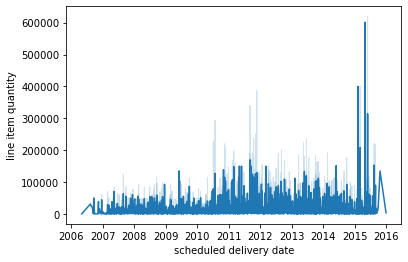

In [24]:
sns.lineplot(x="scheduled delivery date", y="line item quantity", data=df)

## Visualizations for 2015

In [25]:
df_year = df[df["scheduled delivery date"] >= "2015-01-01"]

<AxesSubplot:xlabel='scheduled delivery date', ylabel='line item quantity'>

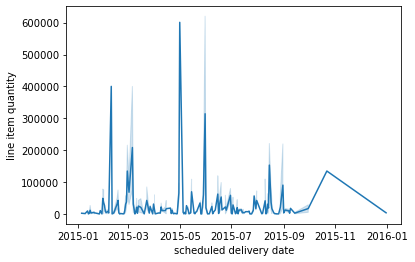

In [26]:
sns.lineplot(x="scheduled delivery date", y="line item quantity", data=df_year)

Above graph goes down nearing 2016 and that's where the supplying ends. It might be necessary to drop the second half of 2015 out of the model to avoid skewing the model. 

<AxesSubplot:xlabel='sub classification', ylabel='line item quantity'>

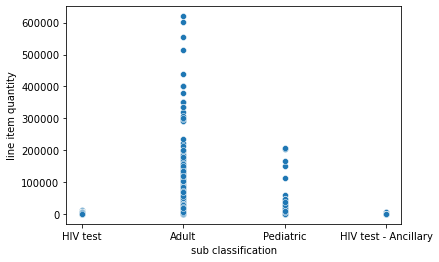

In [27]:
sns.scatterplot(data=df_year, x="sub classification", y="line item quantity")

## NEW TimeSeries Dataframe

In [28]:
# create time series data
ts_df = df.pivot_table(index='delivered to client date', columns='product group', values='line item quantity')


# convert to datetime
ts_df.index = pd.to_datetime(ts_df.index, format="%d-%m-%Y")
ts_df.index.name = "delivery date"
ts_df.index = ts_df.index.strftime("%m-%Y")

# remove timezone information--fixig plot error
ts_df.index = pd.to_datetime(ts_df.index).tz_localize(None)


ts_df = ts_df.resample("M").last()


# handling missing values
ts_df=ts_df.fillna(0)


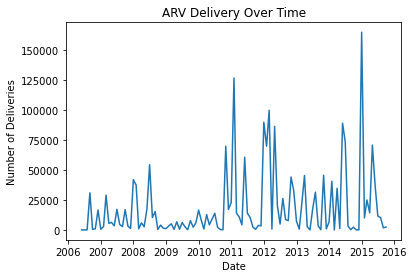

In [29]:
plt.plot(ts_df.index, ts_df['ARV'])

# titles and labels
plt.title('ARV Delivery Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deliveries')


plt.show()

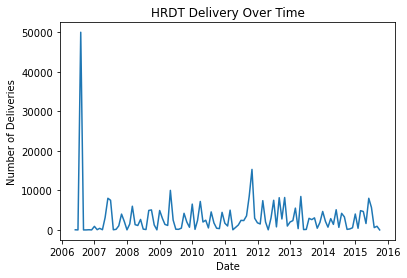

In [30]:
plt.plot(ts_df.index, ts_df['HRDT'])

# titles and labels
plt.title('HRDT Delivery Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deliveries')


plt.show()

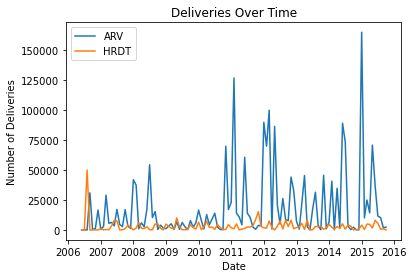

In [31]:
# the data
plt.plot(ts_df.index, ts_df['ARV'], label='ARV')
plt.plot(ts_df.index, ts_df['HRDT'], label='HRDT')

# titles and labels
plt.title('Deliveries Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deliveries')

plt.legend()
plt.show()

In [32]:
ts_df.head()

product group,ARV,HRDT,MRDT
delivery date,,,
2006-05-31,0.0,31.0,0.0
2006-06-30,0.0,0.0,0.0
2006-07-31,0.0,50000.0,0.0
2006-08-31,31000.0,0.0,0.0
2006-09-30,433.5,0.0,0.0


# Stationarity Test

In [33]:
dftest = adfuller(ts_df['ARV'])
print('p-value:', dftest[1])
alpha=0.05

if dftest[1] < alpha:
    print("The data is stationary")
else:
    print("The data is non-stationary")
 

p-value: 1.4101439569394792e-16
The data is stationary


In [34]:
dftest = adfuller(ts_df['HRDT'])
print('p-value:', dftest[1])
alpha=0.05

if dftest[1] < alpha:
    print("The data is stationary")
else:
    print("The data is non-stationary")


p-value: 0.1997321559460396
The data is non-stationary


# HRDT STATIONARY

### Log Difference

In [35]:
#to avoid getting -inf
ts_df = ts_df + 1

In [36]:
ts_df['HRDT'] = np.log(ts_df['HRDT'])
ts_df['HRDT'] = ts_df['HRDT'].diff()
ts_df = ts_df.drop(ts_df.index[0])

In [37]:
ts_df['HRDT'].isnull().sum()

0

In [38]:
ts_df['HRDT'].fillna(0)

delivery date
2006-06-30    -3.465736
2006-07-31    10.819798
2006-08-31   -10.819798
2006-09-30     0.000000
2006-10-31     3.828641
                ...    
2015-05-31     1.596523
2015-06-30    -0.342263
2015-07-31    -2.271739
2015-08-31     0.456474
2015-09-30    -6.829794
Freq: M, Name: HRDT, Length: 112, dtype: float64

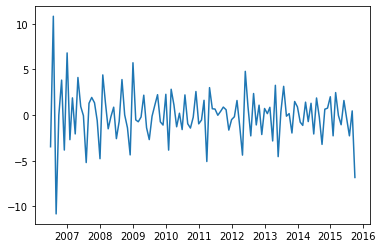

In [39]:
plt.plot(ts_df['HRDT'])

# First Simple Model

In [40]:
# Train-test split
train_data = ts_df.loc[:'09-2014']
test_data = ts_df.loc['10-2014':]

# ARIMA model
model = sm.tsa.ARIMA(train_data['ARV'], order=(1, 1, 1), dates=train_data.index, freq='M')
results = model.fit()

arv_pred = results.predict(start='11-2014', end='10-2015')

#error
mae = pd.Series.abs(arv_pred - test_data['ARV']).mean()
print('Mean Absolute Error:', mae)

Mean Absolute Error: 28586.05681335224


In [41]:
# Train-test split
train_data = ts_df.loc[:'09-2014']
test_data = ts_df.loc['10-2014':]


# ARIMA model
model = sm.tsa.ARIMA(train_data['HRDT'], order=(1, 1, 1), dates=train_data.index, freq='M')
results = model.fit()

hrdt_pred = results.predict(start='11-2014', end='10-2015')

# error
mae = pd.Series.abs(hrdt_pred - test_data['HRDT']).mean()
print('Mean Absolute Error:', mae)

Mean Absolute Error: 1.8389643897674766


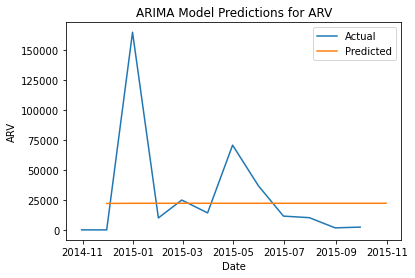

In [42]:
plt.plot(test_data.index, test_data['ARV'], label='Actual')
plt.plot(arv_pred.index, arv_pred, label='Predicted')

plt.title('ARIMA Model Predictions for ARV')
plt.xlabel('Date')
plt.ylabel('ARV')
plt.legend()

plt.show()

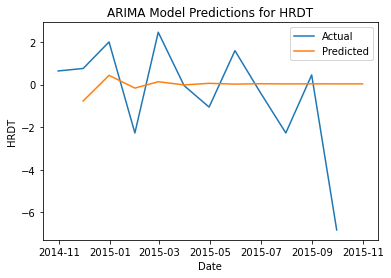

In [43]:
plt.plot(test_data.index, test_data['HRDT'], label='Actual')
plt.plot(hrdt_pred.index, hrdt_pred, label='Predicted')

plt.title('ARIMA Model Predictions for HRDT')
plt.xlabel('Date')
plt.ylabel('HRDT')
plt.legend()

plt.show()

# SARIMA

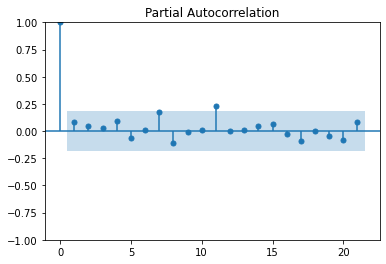

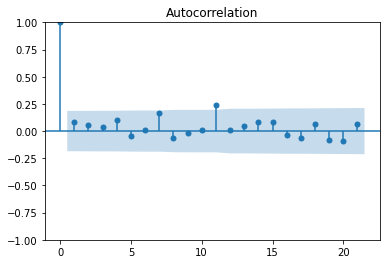

In [44]:
plot_pacf(ts_df['ARV'], method='ywm');
plot_acf(ts_df['ARV']);

In [45]:
# Train-test split
train_data = ts_df.loc[:'09-2014']
test_data = ts_df.loc['10-2014':]

# SARIMA model
model = sm.tsa.statespace.SARIMAX(train_data['ARV'], order=(0,0,1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Predictions
arv_pred = results.predict(start='11-2014', end='9-2015')

# Error
mae = pd.Series.abs(arv_pred - test_data['ARV']).mean()
print('Mean Absolute Error:', mae)


Mean Absolute Error: 24226.527404192773


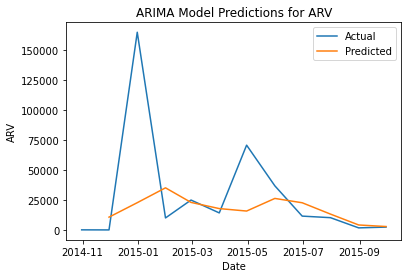

In [46]:
plt.plot(test_data.index, test_data['ARV'], label='Actual')
plt.plot(arv_pred.index, arv_pred, label='Predicted')

plt.title('ARIMA Model Predictions for ARV')
plt.xlabel('Date')
plt.ylabel('ARV')
plt.legend()

plt.show()

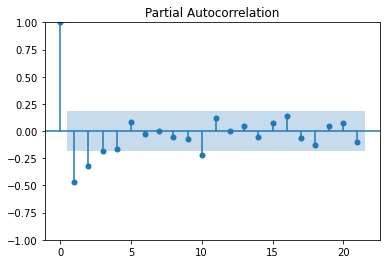

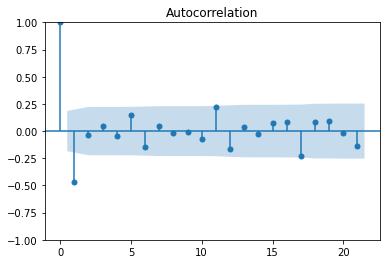

In [47]:
plot_pacf(ts_df['HRDT'], method='ywm');
plot_acf(ts_df['HRDT']);

In [68]:
# Train-test split
train_data = ts_df.loc[:'09-2014']
test_data = ts_df.loc['10-2014':]

# SARIMA model
model = sm.tsa.statespace.SARIMAX(train_data['HRDT'], order=(2,1,1), seasonal_order=(0,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Predictions
hrdt_pred = results.predict(start='11-2014', end='9-2015')

# Error
mae = pd.Series.abs(hrdt_pred - test_data['HRDT']).mean()
print('Mean Absolute Error:', mae)


Mean Absolute Error: 1.8878892146446908


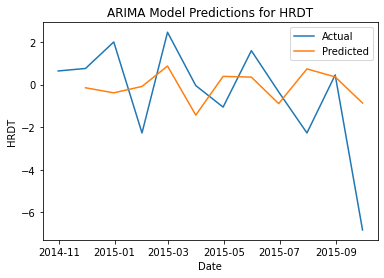

In [69]:
plt.plot(test_data.index, test_data['HRDT'], label='Actual')
plt.plot(hrdt_pred.index, hrdt_pred, label='Predicted')

plt.title('ARIMA Model Predictions for HRDT')
plt.xlabel('Date')
plt.ylabel('HRDT')
plt.legend()

plt.show()

# GridSearch for SARIMA parameters

## Citation: https://towardsdatascience.com/grid-search-for-sarimax-parameters-adbd5104cb8b

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]



# Define function
def sarimax_gridsearch(ts_df, pdq, pdqs, maxiter=50, freq='M'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = [[]]
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts_df,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                freq=freq)

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {}12 : BIC Calculated ={}'.format(comb, combs, output.bic))
            except Exception as e:
                print(f"Error: {e}")
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])
    ans_df = ans_df.dropna()

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
    
    return ans_df


In [61]:
sarimax_gridsearch(ts_df['ARV'], pdq, pdqs, freq='M')

SARIMAX (0, 0, 0) x (0, 0, 0, 12)12 : BIC Calculated =2636.5633378932025
SARIMAX (0, 0, 0) x (0, 0, 1, 12)12 : BIC Calculated =2358.7335910644297
SARIMAX (0, 0, 0) x (0, 0, 2, 12)12 : BIC Calculated =2082.5585639326973
SARIMAX (0, 0, 0) x (0, 1, 0, 12)12 : BIC Calculated =2379.1068780602727
SARIMAX (0, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated =2074.6016611069135
SARIMAX (0, 0, 0) x (0, 1, 2, 12)12 : BIC Calculated =1802.275023487787
SARIMAX (0, 0, 0) x (0, 2, 0, 12)12 : BIC Calculated =2179.149551938578
SARIMAX (0, 0, 0) x (0, 2, 1, 12)12 : BIC Calculated =1829.9690305059935
SARIMAX (0, 0, 0) x (0, 2, 2, 12)12 : BIC Calculated =5586.119710085531
SARIMAX (0, 0, 0) x (1, 0, 0, 12)12 : BIC Calculated =2378.0286491329543
SARIMAX (0, 0, 0) x (1, 0, 1, 12)12 : BIC Calculated =2346.646210042253
SARIMAX (0, 0, 0) x (1, 0, 2, 12)12 : BIC Calculated =2071.8068844335144
SARIMAX (0, 0, 0) x (1, 1, 0, 12)12 : BIC Calculated =2111.44555587914
SARIMAX (0, 0, 0) x (1, 1, 1, 12)12 : BIC Calculated =207

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 0) x (2, 2, 2, 12)12 : BIC Calculated =2129.677275753862
SARIMAX (0, 0, 1) x (0, 0, 0, 12)12 : BIC Calculated =2608.7912278620415
SARIMAX (0, 0, 1) x (0, 0, 1, 12)12 : BIC Calculated =2334.610643160867
SARIMAX (0, 0, 1) x (0, 0, 2, 12)12 : BIC Calculated =2059.457296599319
SARIMAX (0, 0, 1) x (0, 1, 0, 12)12 : BIC Calculated =2359.5073175086413
SARIMAX (0, 0, 1) x (0, 1, 1, 12)12 : BIC Calculated =2050.186907762874
SARIMAX (0, 0, 1) x (0, 1, 2, 12)12 : BIC Calculated =1774.966182039863
SARIMAX (0, 0, 1) x (0, 2, 0, 12)12 : BIC Calculated =2155.8891858874777
SARIMAX (0, 0, 1) x (0, 2, 1, 12)12 : BIC Calculated =1818.191048677408
SARIMAX (0, 0, 1) x (0, 2, 2, 12)12 : BIC Calculated =5490.6459405364985
SARIMAX (0, 0, 1) x (1, 0, 0, 12)12 : BIC Calculated =2380.598141912392
SARIMAX (0, 0, 1) x (1, 0, 1, 12)12 : BIC Calculated =2323.0785242562374
SARIMAX (0, 0, 1) x (1, 0, 2, 12)12 : BIC Calculated =2047.868579164006
SARIMAX (0, 0, 1) x (1, 1, 0, 12)12 : BIC Calculated =2116.

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (2, 2, 2, 12)12 : BIC Calculated =2649.8221968250023
SARIMAX (0, 1, 1) x (0, 0, 0, 12)12 : BIC Calculated =2557.6130717232345
SARIMAX (0, 1, 1) x (0, 0, 1, 12)12 : BIC Calculated =2290.366732465029
SARIMAX (0, 1, 1) x (0, 0, 2, 12)12 : BIC Calculated =2014.9808329457655
SARIMAX (0, 1, 1) x (0, 1, 0, 12)12 : BIC Calculated =2338.098060690654
SARIMAX (0, 1, 1) x (0, 1, 1, 12)12 : BIC Calculated =2028.1756190346227
SARIMAX (0, 1, 1) x (0, 1, 2, 12)12 : BIC Calculated =1752.0201693732583
SARIMAX (0, 1, 1) x (0, 2, 0, 12)12 : BIC Calculated =2133.409892583158
SARIMAX (0, 1, 1) x (0, 2, 1, 12)12 : BIC Calculated =1803.4452495126015
SARIMAX (0, 1, 1) x (0, 2, 2, 12)12 : BIC Calculated =5523.63952144332
SARIMAX (0, 1, 1) x (1, 0, 0, 12)12 : BIC Calculated =2335.517922673847
SARIMAX (0, 1, 1) x (1, 0, 1, 12)12 : BIC Calculated =2287.5188970582785
SARIMAX (0, 1, 1) x (1, 0, 2, 12)12 : BIC Calculated =2013.694104633276
SARIMAX (0, 1, 1) x (1, 1, 0, 12)12 : BIC Calculated =2095

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (2, 0, 0, 12)12 : BIC Calculated =2066.774234680086
SARIMAX (0, 1, 2) x (2, 0, 1, 12)12 : BIC Calculated =2062.073632349729
SARIMAX (0, 1, 2) x (2, 0, 2, 12)12 : BIC Calculated =1996.2473776336062
SARIMAX (0, 1, 2) x (2, 1, 0, 12)12 : BIC Calculated =1801.575229163414
SARIMAX (0, 1, 2) x (2, 1, 1, 12)12 : BIC Calculated =1804.1163764187877
SARIMAX (0, 1, 2) x (2, 1, 2, 12)12 : BIC Calculated =1736.6086299636484
SARIMAX (0, 1, 2) x (2, 2, 0, 12)12 : BIC Calculated =1569.1418816642863
SARIMAX (0, 1, 2) x (2, 2, 1, 12)12 : BIC Calculated =1564.3875082353964
SARIMAX (0, 1, 2) x (2, 2, 2, 12)12 : BIC Calculated =5425.146187635612
SARIMAX (0, 2, 0) x (0, 0, 0, 12)12 : BIC Calculated =2737.2633521517537
SARIMAX (0, 2, 0) x (0, 0, 1, 12)12 : BIC Calculated =2447.2217153371835
SARIMAX (0, 2, 0) x (0, 0, 2, 12)12 : BIC Calculated =2156.6109889968075
SARIMAX (0, 2, 0) x (0, 1, 0, 12)12 : BIC Calculated =2515.994268231988
SARIMAX (0, 2, 0) x (0, 1, 1, 12)12 : BIC Calculated =21

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (0, 2, 2, 12)12 : BIC Calculated =2439.942772981942
SARIMAX (0, 2, 1) x (1, 0, 0, 12)12 : BIC Calculated =2369.0055893651333
SARIMAX (0, 2, 1) x (1, 0, 1, 12)12 : BIC Calculated =2326.8383505124766
SARIMAX (0, 2, 1) x (1, 0, 2, 12)12 : BIC Calculated =2048.794106994202
SARIMAX (0, 2, 1) x (1, 1, 0, 12)12 : BIC Calculated =2130.495654747495
SARIMAX (0, 2, 1) x (1, 1, 1, 12)12 : BIC Calculated =2064.0935909533196
SARIMAX (0, 2, 1) x (1, 1, 2, 12)12 : BIC Calculated =1780.3613785429438
SARIMAX (0, 2, 1) x (1, 2, 0, 12)12 : BIC Calculated =1906.8703314129334
SARIMAX (0, 2, 1) x (1, 2, 1, 12)12 : BIC Calculated =1832.2798430465348


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (1, 2, 2, 12)12 : BIC Calculated =3063.449312343292
SARIMAX (0, 2, 1) x (2, 0, 0, 12)12 : BIC Calculated =2088.468132417411
SARIMAX (0, 2, 1) x (2, 0, 1, 12)12 : BIC Calculated =2080.7115541559315
SARIMAX (0, 2, 1) x (2, 0, 2, 12)12 : BIC Calculated =2034.196532416042
SARIMAX (0, 2, 1) x (2, 1, 0, 12)12 : BIC Calculated =1818.9327244702106
SARIMAX (0, 2, 1) x (2, 1, 1, 12)12 : BIC Calculated =1823.2321165654048
SARIMAX (0, 2, 1) x (2, 1, 2, 12)12 : BIC Calculated =1776.0567763620913
SARIMAX (0, 2, 1) x (2, 2, 0, 12)12 : BIC Calculated =1579.6584219208967
SARIMAX (0, 2, 1) x (2, 2, 1, 12)12 : BIC Calculated =1577.7426549670777


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 2, 2, 12)12 : BIC Calculated =4473.472792163915
SARIMAX (0, 2, 2) x (0, 0, 0, 12)12 : BIC Calculated =2540.021381864831
SARIMAX (0, 2, 2) x (0, 0, 1, 12)12 : BIC Calculated =2267.3332241267203
SARIMAX (0, 2, 2) x (0, 0, 2, 12)12 : BIC Calculated =1988.8735075063316
SARIMAX (0, 2, 2) x (0, 1, 0, 12)12 : BIC Calculated =2326.671901093165
SARIMAX (0, 2, 2) x (0, 1, 1, 12)12 : BIC Calculated =2025.2812592040352
SARIMAX (0, 2, 2) x (0, 1, 2, 12)12 : BIC Calculated =1741.1481363493435
SARIMAX (0, 2, 2) x (0, 2, 0, 12)12 : BIC Calculated =2118.2828008436186
SARIMAX (0, 2, 2) x (0, 2, 1, 12)12 : BIC Calculated =1802.1917248939142
SARIMAX (0, 2, 2) x (0, 2, 2, 12)12 : BIC Calculated =5320.361147448492
SARIMAX (0, 2, 2) x (1, 0, 0, 12)12 : BIC Calculated =2336.7349245441937
SARIMAX (0, 2, 2) x (1, 0, 1, 12)12 : BIC Calculated =2266.6769128011097
SARIMAX (0, 2, 2) x (1, 0, 2, 12)12 : BIC Calculated =1989.3973207013107
SARIMAX (0, 2, 2) x (1, 1, 0, 12)12 : BIC Calculated =2

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 0, 2, 12)12 : BIC Calculated =1991.8826158045497
SARIMAX (0, 2, 2) x (2, 1, 0, 12)12 : BIC Calculated =1810.162232084458
SARIMAX (0, 2, 2) x (2, 1, 1, 12)12 : BIC Calculated =1813.8565614878817
SARIMAX (0, 2, 2) x (2, 1, 2, 12)12 : BIC Calculated =1745.1384102415186
SARIMAX (0, 2, 2) x (2, 2, 0, 12)12 : BIC Calculated =1578.333030707304
SARIMAX (0, 2, 2) x (2, 2, 1, 12)12 : BIC Calculated =1578.8599725360714
SARIMAX (0, 2, 2) x (2, 2, 2, 12)12 : BIC Calculated =5281.6699036367
SARIMAX (1, 0, 0) x (0, 0, 0, 12)12 : BIC Calculated =2626.1600360636
SARIMAX (1, 0, 0) x (0, 0, 1, 12)12 : BIC Calculated =2356.3214445476438
SARIMAX (1, 0, 0) x (0, 0, 2, 12)12 : BIC Calculated =2081.476849091639
SARIMAX (1, 0, 0) x (0, 1, 0, 12)12 : BIC Calculated =2382.503377199529
SARIMAX (1, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated =2072.5431860100903
SARIMAX (1, 0, 0) x (0, 1, 2, 12)12 : BIC Calculated =1797.4972404311743
SARIMAX (1, 0, 0) x (0, 2, 0, 12)12 : BIC Calculated =2179.79

SARIMAX (1, 1, 0) x (2, 2, 1, 12)12 : BIC Calculated =1546.9315846009417
SARIMAX (1, 1, 0) x (2, 2, 2, 12)12 : BIC Calculated =5611.0487362381555
SARIMAX (1, 1, 1) x (0, 0, 0, 12)12 : BIC Calculated =2562.2235855130552
SARIMAX (1, 1, 1) x (0, 0, 1, 12)12 : BIC Calculated =2294.789939494654
SARIMAX (1, 1, 1) x (0, 0, 2, 12)12 : BIC Calculated =2019.4197198047175
SARIMAX (1, 1, 1) x (0, 1, 0, 12)12 : BIC Calculated =2342.3195173192976
SARIMAX (1, 1, 1) x (0, 1, 1, 12)12 : BIC Calculated =2032.599302062661
SARIMAX (1, 1, 1) x (0, 1, 2, 12)12 : BIC Calculated =1756.2783451657465
SARIMAX (1, 1, 1) x (0, 2, 0, 12)12 : BIC Calculated =2137.1634137447636
SARIMAX (1, 1, 1) x (0, 2, 1, 12)12 : BIC Calculated =1807.202670470677
SARIMAX (1, 1, 1) x (0, 2, 2, 12)12 : BIC Calculated =5527.385408840841
SARIMAX (1, 1, 1) x (1, 0, 0, 12)12 : BIC Calculated =2317.406739064946
SARIMAX (1, 1, 1) x (1, 0, 1, 12)12 : BIC Calculated =2292.0243302189674
SARIMAX (1, 1, 1) x (1, 0, 2, 12)12 : BIC Calculated =20

SARIMAX (1, 2, 2) x (0, 1, 1, 12)12 : BIC Calculated =2021.7092114668628
SARIMAX (1, 2, 2) x (0, 1, 2, 12)12 : BIC Calculated =1739.0077841928937
SARIMAX (1, 2, 2) x (0, 2, 0, 12)12 : BIC Calculated =2113.6096140673253
SARIMAX (1, 2, 2) x (0, 2, 1, 12)12 : BIC Calculated =1795.193036949576
SARIMAX (1, 2, 2) x (0, 2, 2, 12)12 : BIC Calculated =5312.540940101332
SARIMAX (1, 2, 2) x (1, 0, 0, 12)12 : BIC Calculated =2313.467609437181
SARIMAX (1, 2, 2) x (1, 0, 1, 12)12 : BIC Calculated =2266.1822429957006
SARIMAX (1, 2, 2) x (1, 0, 2, 12)12 : BIC Calculated =1989.6401401334992
SARIMAX (1, 2, 2) x (1, 1, 0, 12)12 : BIC Calculated =2081.1893921632313
SARIMAX (1, 2, 2) x (1, 1, 1, 12)12 : BIC Calculated =2025.6575409733537
SARIMAX (1, 2, 2) x (1, 1, 2, 12)12 : BIC Calculated =1743.1961894815463
SARIMAX (1, 2, 2) x (1, 2, 0, 12)12 : BIC Calculated =1858.5488882386003
SARIMAX (1, 2, 2) x (1, 2, 1, 12)12 : BIC Calculated =1797.1522786628063
SARIMAX (1, 2, 2) x (1, 2, 2, 12)12 : BIC Calculated =

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 0, 2, 12)12 : BIC Calculated =1992.3667423489208
SARIMAX (1, 2, 2) x (2, 1, 0, 12)12 : BIC Calculated =1783.2266227646073
SARIMAX (1, 2, 2) x (2, 1, 1, 12)12 : BIC Calculated =1786.891495782588


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 2, 12)12 : BIC Calculated =1742.406566982238
SARIMAX (1, 2, 2) x (2, 2, 0, 12)12 : BIC Calculated =1547.7215889994088
SARIMAX (1, 2, 2) x (2, 2, 1, 12)12 : BIC Calculated =1547.3653192846414


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 2, 12)12 : BIC Calculated =32.62029955124576
SARIMAX (2, 0, 0) x (0, 0, 0, 12)12 : BIC Calculated =2601.4350828106835
SARIMAX (2, 0, 0) x (0, 0, 1, 12)12 : BIC Calculated =2355.4437839850184
SARIMAX (2, 0, 0) x (0, 0, 2, 12)12 : BIC Calculated =2078.7764303750523
SARIMAX (2, 0, 0) x (0, 1, 0, 12)12 : BIC Calculated =2364.0506400358377
SARIMAX (2, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated =2076.5781615555957
SARIMAX (2, 0, 0) x (0, 1, 2, 12)12 : BIC Calculated =1801.6643428225134
SARIMAX (2, 0, 0) x (0, 2, 0, 12)12 : BIC Calculated =2160.1330051021782
SARIMAX (2, 0, 0) x (0, 2, 1, 12)12 : BIC Calculated =1845.5672261885866
SARIMAX (2, 0, 0) x (0, 2, 2, 12)12 : BIC Calculated =5581.970724562445
SARIMAX (2, 0, 0) x (1, 0, 0, 12)12 : BIC Calculated =2332.8961927673263
SARIMAX (2, 0, 0) x (1, 0, 1, 12)12 : BIC Calculated =2325.6123895333108
SARIMAX (2, 0, 0) x (1, 0, 2, 12)12 : BIC Calculated =2073.697867789504
SARIMAX (2, 0, 0) x (1, 1, 0, 12)12 : BIC Calculated =

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 1, 12)12 : BIC Calculated =2049.5597288261156


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 2, 12)12 : BIC Calculated =2051.0441014185844
SARIMAX (2, 0, 1) x (2, 1, 0, 12)12 : BIC Calculated =1774.6239676822995
SARIMAX (2, 0, 1) x (2, 1, 1, 12)12 : BIC Calculated =1776.8745748335318
SARIMAX (2, 0, 1) x (2, 1, 2, 12)12 : BIC Calculated =1779.3714945070672
SARIMAX (2, 0, 1) x (2, 2, 0, 12)12 : BIC Calculated =1539.2048059128142
SARIMAX (2, 0, 1) x (2, 2, 1, 12)12 : BIC Calculated =1532.438477988584
SARIMAX (2, 0, 1) x (2, 2, 2, 12)12 : BIC Calculated =5311.758239216026
SARIMAX (2, 0, 2) x (0, 0, 0, 12)12 : BIC Calculated =2570.185804659254
SARIMAX (2, 0, 2) x (0, 0, 1, 12)12 : BIC Calculated =2302.9507655394045
SARIMAX (2, 0, 2) x (0, 0, 2, 12)12 : BIC Calculated =2027.3959947678427
SARIMAX (2, 0, 2) x (0, 1, 0, 12)12 : BIC Calculated =2343.37736754155
SARIMAX (2, 0, 2) x (0, 1, 1, 12)12 : BIC Calculated =2038.8552044540716
SARIMAX (2, 0, 2) x (0, 1, 2, 12)12 : BIC Calculated =1759.6319102280036
SARIMAX (2, 0, 2) x (0, 2, 0, 12)12 : BIC Calculated =21

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 0, 2, 12)12 : BIC Calculated =2025.931251265238
SARIMAX (2, 0, 2) x (1, 1, 0, 12)12 : BIC Calculated =2077.8662473401732
SARIMAX (2, 0, 2) x (1, 1, 1, 12)12 : BIC Calculated =2042.6153914360787
SARIMAX (2, 0, 2) x (1, 1, 2, 12)12 : BIC Calculated =1762.5425628099274
SARIMAX (2, 0, 2) x (1, 2, 0, 12)12 : BIC Calculated =1853.3395109661367
SARIMAX (2, 0, 2) x (1, 2, 1, 12)12 : BIC Calculated =1805.5083246111324
SARIMAX (2, 0, 2) x (1, 2, 2, 12)12 : BIC Calculated =5416.151171640389
SARIMAX (2, 0, 2) x (2, 0, 0, 12)12 : BIC Calculated =2052.0593777680974


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 1, 12)12 : BIC Calculated =2047.7991271358942


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 2, 12)12 : BIC Calculated =2031.1090537053203
SARIMAX (2, 0, 2) x (2, 1, 0, 12)12 : BIC Calculated =1777.1850905596712
SARIMAX (2, 0, 2) x (2, 1, 1, 12)12 : BIC Calculated =1781.3152597954838
SARIMAX (2, 0, 2) x (2, 1, 2, 12)12 : BIC Calculated =1762.0894684233754
SARIMAX (2, 0, 2) x (2, 2, 0, 12)12 : BIC Calculated =1539.4706673547616
SARIMAX (2, 0, 2) x (2, 2, 1, 12)12 : BIC Calculated =1536.3690069549152
SARIMAX (2, 0, 2) x (2, 2, 2, 12)12 : BIC Calculated =5230.4044275935075
SARIMAX (2, 1, 0) x (0, 0, 0, 12)12 : BIC Calculated =2586.1477576073976
SARIMAX (2, 1, 0) x (0, 0, 1, 12)12 : BIC Calculated =2339.82625256907
SARIMAX (2, 1, 0) x (0, 0, 2, 12)12 : BIC Calculated =2062.264264781766
SARIMAX (2, 1, 0) x (0, 1, 0, 12)12 : BIC Calculated =2368.741542565166
SARIMAX (2, 1, 0) x (0, 1, 1, 12)12 : BIC Calculated =2071.157471609158
SARIMAX (2, 1, 0) x (0, 1, 2, 12)12 : BIC Calculated =1791.6490928747407
SARIMAX (2, 1, 0) x (0, 2, 0, 12)12 : BIC Calculated =21

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (0, 2, 2, 12)12 : BIC Calculated =24.66524318503987
SARIMAX (2, 1, 1) x (1, 0, 0, 12)12 : BIC Calculated =2299.3857017018204
SARIMAX (2, 1, 1) x (1, 0, 1, 12)12 : BIC Calculated =2296.4681743523965
SARIMAX (2, 1, 1) x (1, 0, 2, 12)12 : BIC Calculated =2029.2186223587494
SARIMAX (2, 1, 1) x (1, 1, 0, 12)12 : BIC Calculated =2057.3201321952993
SARIMAX (2, 1, 1) x (1, 1, 1, 12)12 : BIC Calculated =2040.4239206328182
SARIMAX (2, 1, 1) x (1, 1, 2, 12)12 : BIC Calculated =1763.975041670762
SARIMAX (2, 1, 1) x (1, 2, 0, 12)12 : BIC Calculated =1835.694221051816
SARIMAX (2, 1, 1) x (1, 2, 1, 12)12 : BIC Calculated =1811.800769030074
SARIMAX (2, 1, 1) x (1, 2, 2, 12)12 : BIC Calculated =5542.346135271169
SARIMAX (2, 1, 1) x (2, 0, 0, 12)12 : BIC Calculated =2025.8133248608485
SARIMAX (2, 1, 1) x (2, 0, 1, 12)12 : BIC Calculated =2020.5557884657826
SARIMAX (2, 1, 1) x (2, 0, 2, 12)12 : BIC Calculated =2022.4886146138308
SARIMAX (2, 1, 1) x (2, 1, 0, 12)12 : BIC Calculated =17

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (0, 2, 2, 12)12 : BIC Calculated =122.66948485065811
SARIMAX (2, 2, 1) x (1, 0, 0, 12)12 : BIC Calculated =2303.194745846321
SARIMAX (2, 2, 1) x (1, 0, 1, 12)12 : BIC Calculated =2307.7205340897985
SARIMAX (2, 2, 1) x (1, 0, 2, 12)12 : BIC Calculated =2022.0994499303254
SARIMAX (2, 2, 1) x (1, 1, 0, 12)12 : BIC Calculated =2062.9004670710433
SARIMAX (2, 2, 1) x (1, 1, 1, 12)12 : BIC Calculated =2050.729134353039
SARIMAX (2, 2, 1) x (1, 1, 2, 12)12 : BIC Calculated =1767.8423530776547
SARIMAX (2, 2, 1) x (1, 2, 0, 12)12 : BIC Calculated =1838.1900870864306
SARIMAX (2, 2, 1) x (1, 2, 1, 12)12 : BIC Calculated =1821.3927777484525
SARIMAX (2, 2, 1) x (1, 2, 2, 12)12 : BIC Calculated =5388.009169935337
SARIMAX (2, 2, 1) x (2, 0, 0, 12)12 : BIC Calculated =2024.938346862007
SARIMAX (2, 2, 1) x (2, 0, 1, 12)12 : BIC Calculated =2020.0814572107863
SARIMAX (2, 2, 1) x (2, 0, 2, 12)12 : BIC Calculated =2020.1550566035721
SARIMAX (2, 2, 1) x (2, 1, 0, 12)12 : BIC Calculated =1

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 2, 2, 12)12 : BIC Calculated =32.7547564977768
SARIMAX (2, 2, 2) x (0, 0, 0, 12)12 : BIC Calculated =2540.4403361940745
SARIMAX (2, 2, 2) x (0, 0, 1, 12)12 : BIC Calculated =2269.630590121037
SARIMAX (2, 2, 2) x (0, 0, 2, 12)12 : BIC Calculated =1992.0860222121667
SARIMAX (2, 2, 2) x (0, 1, 0, 12)12 : BIC Calculated =2326.3613694699
SARIMAX (2, 2, 2) x (0, 1, 1, 12)12 : BIC Calculated =2023.2484963810982
SARIMAX (2, 2, 2) x (0, 1, 2, 12)12 : BIC Calculated =1740.9807385057738
SARIMAX (2, 2, 2) x (0, 2, 0, 12)12 : BIC Calculated =2115.7575071317156
SARIMAX (2, 2, 2) x (0, 2, 1, 12)12 : BIC Calculated =1796.4402791254818
SARIMAX (2, 2, 2) x (0, 2, 2, 12)12 : BIC Calculated =5313.328410598675
SARIMAX (2, 2, 2) x (1, 0, 0, 12)12 : BIC Calculated =2292.556902641982


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 1, 12)12 : BIC Calculated =2267.943203458988


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 2, 12)12 : BIC Calculated =1991.7615687350615
SARIMAX (2, 2, 2) x (1, 1, 0, 12)12 : BIC Calculated =2059.340274729344
SARIMAX (2, 2, 2) x (1, 1, 1, 12)12 : BIC Calculated =2027.1839494234075
SARIMAX (2, 2, 2) x (1, 1, 2, 12)12 : BIC Calculated =1744.9267111534
SARIMAX (2, 2, 2) x (1, 2, 0, 12)12 : BIC Calculated =1835.6667288467572
SARIMAX (2, 2, 2) x (1, 2, 1, 12)12 : BIC Calculated =1798.189538479824
SARIMAX (2, 2, 2) x (1, 2, 2, 12)12 : BIC Calculated =5303.0466129422875


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 0, 12)12 : BIC Calculated =2016.3887568443631


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 1, 12)12 : BIC Calculated =2013.34792867855


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 2, 12)12 : BIC Calculated =1994.434115152243
SARIMAX (2, 2, 2) x (2, 1, 0, 12)12 : BIC Calculated =1761.0521410163572
SARIMAX (2, 2, 2) x (2, 1, 1, 12)12 : BIC Calculated =1764.7008184860883


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 2, 12)12 : BIC Calculated =1744.0041902466464
SARIMAX (2, 2, 2) x (2, 2, 0, 12)12 : BIC Calculated =1524.3920555065436
SARIMAX (2, 2, 2) x (2, 2, 1, 12)12 : BIC Calculated =1523.7401537615613
SARIMAX (2, 2, 2) x (2, 2, 2, 12)12 : BIC Calculated =5274.637166786874


,pdq,pdqs,bic
603,"(2, 1, 1)","(0, 2, 2, 12)",24.665243
486,"(1, 2, 2)","(2, 2, 2, 12)",32.620300
702,"(2, 2, 1)","(2, 2, 2, 12)",32.754756
684,"(2, 2, 1)","(0, 2, 2, 12)",122.669485
620,"(2, 1, 1)","(2, 2, 1, 12)",1516.345122


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                        SARIMAX Results                                        
Dep. Variable:                                     ARV   No. Observations:                  112
Model:             SARIMAX(2, 1, 1)x(0, 2, [1, 2], 12)   Log Likelihood               -1065.609
Date:                                 Thu, 13 Apr 2023   AIC                           2143.218
Time:                                         14:43:16   BIC                           2158.014
Sample:                                     06-30-2006   HQIC                          2149.176
                                          - 09-30-2015                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0618      0.453     -0.136      0.892      -0.950       0

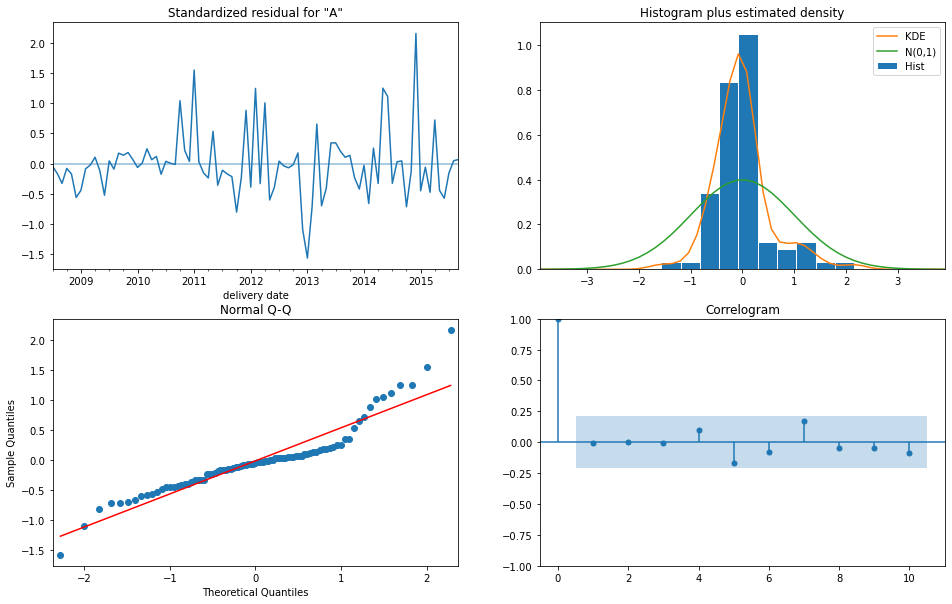

In [65]:
# Build SARIMAX model w/optimal parameters
sarimax = sm.tsa.statespace.SARIMAX(ts_df['ARV'], 
                                    order=(2,1,1), 
                                    seasonal_order=(0,2,2,12), 
                                    freq='M')
                                    
# Fit the model
output = sarimax.fit()
    
# Print output summary
print(output.summary())

# Plot diagnostics
output.plot_diagnostics(figsize=(16,10));

In [66]:
sarimax_gridsearch(ts_df['HRDT'], pdq, pdqs, freq='M')

SARIMAX (0, 0, 0) x (0, 0, 0, 12)12 : BIC Calculated =543.4650882869934
SARIMAX (0, 0, 0) x (0, 0, 1, 12)12 : BIC Calculated =447.7807170637846
SARIMAX (0, 0, 0) x (0, 0, 2, 12)12 : BIC Calculated =393.0317719636017
SARIMAX (0, 0, 0) x (0, 1, 0, 12)12 : BIC Calculated =556.3624080005648
SARIMAX (0, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated =413.75948902798035
SARIMAX (0, 0, 0) x (0, 1, 2, 12)12 : BIC Calculated =354.99818591142036
SARIMAX (0, 0, 0) x (0, 2, 0, 12)12 : BIC Calculated =573.9640055681184
SARIMAX (0, 0, 0) x (0, 2, 1, 12)12 : BIC Calculated =419.3950417601522


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 0) x (0, 2, 2, 12)12 : BIC Calculated =2160.761501819381
SARIMAX (0, 0, 0) x (1, 0, 0, 12)12 : BIC Calculated =446.9678592301144
SARIMAX (0, 0, 0) x (1, 0, 1, 12)12 : BIC Calculated =446.73357387399045
SARIMAX (0, 0, 0) x (1, 0, 2, 12)12 : BIC Calculated =397.0260583704922
SARIMAX (0, 0, 0) x (1, 1, 0, 12)12 : BIC Calculated =435.1967020487447
SARIMAX (0, 0, 0) x (1, 1, 1, 12)12 : BIC Calculated =415.540267606649
SARIMAX (0, 0, 0) x (1, 1, 2, 12)12 : BIC Calculated =354.1660442696359
SARIMAX (0, 0, 0) x (1, 2, 0, 12)12 : BIC Calculated =440.3001375058013
SARIMAX (0, 0, 0) x (1, 2, 1, 12)12 : BIC Calculated =408.16759966507266


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 0) x (1, 2, 2, 12)12 : BIC Calculated =2879.071791193346
SARIMAX (0, 0, 0) x (2, 0, 0, 12)12 : BIC Calculated =397.4939830379235
SARIMAX (0, 0, 0) x (2, 0, 1, 12)12 : BIC Calculated =401.1938449199738
SARIMAX (0, 0, 0) x (2, 0, 2, 12)12 : BIC Calculated =400.97864113770635
SARIMAX (0, 0, 0) x (2, 1, 0, 12)12 : BIC Calculated =363.5905281670501
SARIMAX (0, 0, 0) x (2, 1, 1, 12)12 : BIC Calculated =358.4313540626645
SARIMAX (0, 0, 0) x (2, 1, 2, 12)12 : BIC Calculated =358.9101378542662
SARIMAX (0, 0, 0) x (2, 2, 0, 12)12 : BIC Calculated =361.6123531876214
SARIMAX (0, 0, 0) x (2, 2, 1, 12)12 : BIC Calculated =340.34050455450773


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 0) x (2, 2, 2, 12)12 : BIC Calculated =2405.6061755510605
SARIMAX (0, 0, 1) x (0, 0, 0, 12)12 : BIC Calculated =480.0536893152631
SARIMAX (0, 0, 1) x (0, 0, 1, 12)12 : BIC Calculated =395.81623999446657
SARIMAX (0, 0, 1) x (0, 0, 2, 12)12 : BIC Calculated =348.61992535085136
SARIMAX (0, 0, 1) x (0, 1, 0, 12)12 : BIC Calculated =467.07178471650803
SARIMAX (0, 0, 1) x (0, 1, 1, 12)12 : BIC Calculated =374.25817881104814
SARIMAX (0, 0, 1) x (0, 1, 2, 12)12 : BIC Calculated =322.04095681851544
SARIMAX (0, 0, 1) x (0, 2, 0, 12)12 : BIC Calculated =492.4515141652848
SARIMAX (0, 0, 1) x (0, 2, 1, 12)12 : BIC Calculated =367.52508628514113


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (0, 2, 2, 12)12 : BIC Calculated =2569.0985021445304
SARIMAX (0, 0, 1) x (1, 0, 0, 12)12 : BIC Calculated =404.56260508132397
SARIMAX (0, 0, 1) x (1, 0, 1, 12)12 : BIC Calculated =400.0119318013452
SARIMAX (0, 0, 1) x (1, 0, 2, 12)12 : BIC Calculated =352.94961006374297
SARIMAX (0, 0, 1) x (1, 1, 0, 12)12 : BIC Calculated =390.1020578532351
SARIMAX (0, 0, 1) x (1, 1, 1, 12)12 : BIC Calculated =380.87417279714475
SARIMAX (0, 0, 1) x (1, 1, 2, 12)12 : BIC Calculated =323.41924388264306
SARIMAX (0, 0, 1) x (1, 2, 0, 12)12 : BIC Calculated =389.0238501219524
SARIMAX (0, 0, 1) x (1, 2, 1, 12)12 : BIC Calculated =364.2809255973991


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (1, 2, 2, 12)12 : BIC Calculated =2420.899664220961
SARIMAX (0, 0, 1) x (2, 0, 0, 12)12 : BIC Calculated =357.60021584860215
SARIMAX (0, 0, 1) x (2, 0, 1, 12)12 : BIC Calculated =360.66483704419807
SARIMAX (0, 0, 1) x (2, 0, 2, 12)12 : BIC Calculated =357.3645171903429
SARIMAX (0, 0, 1) x (2, 1, 0, 12)12 : BIC Calculated =333.5222842173121
SARIMAX (0, 0, 1) x (2, 1, 1, 12)12 : BIC Calculated =336.70590501783715
SARIMAX (0, 0, 1) x (2, 1, 2, 12)12 : BIC Calculated =325.6726488806348
SARIMAX (0, 0, 1) x (2, 2, 0, 12)12 : BIC Calculated =323.453204254915
SARIMAX (0, 0, 1) x (2, 2, 1, 12)12 : BIC Calculated =315.57244157135426
SARIMAX (0, 0, 1) x (2, 2, 2, 12)12 : BIC Calculated =2295.257785776455
SARIMAX (0, 0, 2) x (0, 0, 0, 12)12 : BIC Calculated =468.5781174950969
SARIMAX (0, 0, 2) x (0, 0, 1, 12)12 : BIC Calculated =393.6995849229112
SARIMAX (0, 0, 2) x (0, 0, 2, 12)12 : BIC Calculated =347.9059413970942
SARIMAX (0, 0, 2) x (0, 1, 0, 12)12 : BIC Calculated =466.652

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (2, 2, 2, 12)12 : BIC Calculated =2333.7773082449926
SARIMAX (0, 1, 0) x (0, 0, 0, 12)12 : BIC Calculated =647.4640780714365
SARIMAX (0, 1, 0) x (0, 0, 1, 12)12 : BIC Calculated =533.4969598374223


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (0, 0, 2, 12)12 : BIC Calculated =472.2606840045926
SARIMAX (0, 1, 0) x (0, 1, 0, 12)12 : BIC Calculated =651.439358007857
SARIMAX (0, 1, 0) x (0, 1, 1, 12)12 : BIC Calculated =492.7926299008221
SARIMAX (0, 1, 0) x (0, 1, 2, 12)12 : BIC Calculated =413.03531415537344
SARIMAX (0, 1, 0) x (0, 2, 0, 12)12 : BIC Calculated =658.8928119425273
SARIMAX (0, 1, 0) x (0, 2, 1, 12)12 : BIC Calculated =493.49875803543523


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (0, 2, 2, 12)12 : BIC Calculated =2115.4542465000013
SARIMAX (0, 1, 0) x (1, 0, 0, 12)12 : BIC Calculated =533.454172075514
SARIMAX (0, 1, 0) x (1, 0, 1, 12)12 : BIC Calculated =533.200473066059


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (1, 0, 2, 12)12 : BIC Calculated =475.45808480594275
SARIMAX (0, 1, 0) x (1, 1, 0, 12)12 : BIC Calculated =517.3796195855833
SARIMAX (0, 1, 0) x (1, 1, 1, 12)12 : BIC Calculated =485.2846073724938


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (1, 1, 2, 12)12 : BIC Calculated =414.7275858087153
SARIMAX (0, 1, 0) x (1, 2, 0, 12)12 : BIC Calculated =516.4305733451554
SARIMAX (0, 1, 0) x (1, 2, 1, 12)12 : BIC Calculated =477.01520453958096


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (1, 2, 2, 12)12 : BIC Calculated =2838.6705424124198
SARIMAX (0, 1, 0) x (2, 0, 0, 12)12 : BIC Calculated =475.45127240685764
SARIMAX (0, 1, 0) x (2, 0, 1, 12)12 : BIC Calculated =479.4998853027593


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (2, 0, 2, 12)12 : BIC Calculated =479.7418900990591
SARIMAX (0, 1, 0) x (2, 1, 0, 12)12 : BIC Calculated =430.4113416802608
SARIMAX (0, 1, 0) x (2, 1, 1, 12)12 : BIC Calculated =418.3230569784478


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (2, 1, 2, 12)12 : BIC Calculated =417.9506844081971
SARIMAX (0, 1, 0) x (2, 2, 0, 12)12 : BIC Calculated =421.2151617748241
SARIMAX (0, 1, 0) x (2, 2, 1, 12)12 : BIC Calculated =396.8263774579713


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (2, 2, 2, 12)12 : BIC Calculated =2086.8703176026647
SARIMAX (0, 1, 1) x (0, 0, 0, 12)12 : BIC Calculated =508.4709223826716
SARIMAX (0, 1, 1) x (0, 0, 1, 12)12 : BIC Calculated =445.09186261210397
SARIMAX (0, 1, 1) x (0, 0, 2, 12)12 : BIC Calculated =392.2857253528138
SARIMAX (0, 1, 1) x (0, 1, 0, 12)12 : BIC Calculated =525.4140319873794
SARIMAX (0, 1, 1) x (0, 1, 1, 12)12 : BIC Calculated =401.7015037899306
SARIMAX (0, 1, 1) x (0, 1, 2, 12)12 : BIC Calculated =354.21913352786373
SARIMAX (0, 1, 1) x (0, 2, 0, 12)12 : BIC Calculated =557.636684398429
SARIMAX (0, 1, 1) x (0, 2, 1, 12)12 : BIC Calculated =409.51017184306215


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 1) x (0, 2, 2, 12)12 : BIC Calculated =2623.6882075367803
SARIMAX (0, 1, 1) x (1, 0, 0, 12)12 : BIC Calculated =452.60292585191104
SARIMAX (0, 1, 1) x (1, 0, 1, 12)12 : BIC Calculated =447.8412196631763


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 1) x (1, 0, 2, 12)12 : BIC Calculated =394.1804187368637
SARIMAX (0, 1, 1) x (1, 1, 0, 12)12 : BIC Calculated =440.18622883629143
SARIMAX (0, 1, 1) x (1, 1, 1, 12)12 : BIC Calculated =412.99272211138214
SARIMAX (0, 1, 1) x (1, 1, 2, 12)12 : BIC Calculated =353.4341916237429
SARIMAX (0, 1, 1) x (1, 2, 0, 12)12 : BIC Calculated =444.23440417138323
SARIMAX (0, 1, 1) x (1, 2, 1, 12)12 : BIC Calculated =401.3463253040521


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 1) x (1, 2, 2, 12)12 : BIC Calculated =20.554369320866556
SARIMAX (0, 1, 1) x (2, 0, 0, 12)12 : BIC Calculated =401.2584748606094
SARIMAX (0, 1, 1) x (2, 0, 1, 12)12 : BIC Calculated =406.2356735503891
SARIMAX (0, 1, 1) x (2, 0, 2, 12)12 : BIC Calculated =397.7400212209245
SARIMAX (0, 1, 1) x (2, 1, 0, 12)12 : BIC Calculated =368.4511451761912
SARIMAX (0, 1, 1) x (2, 1, 1, 12)12 : BIC Calculated =364.3743553955753
SARIMAX (0, 1, 1) x (2, 1, 2, 12)12 : BIC Calculated =359.00848917601985
SARIMAX (0, 1, 1) x (2, 2, 0, 12)12 : BIC Calculated =365.39082248495714
SARIMAX (0, 1, 1) x (2, 2, 1, 12)12 : BIC Calculated =346.02458438588906


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 1) x (2, 2, 2, 12)12 : BIC Calculated =24.66524318503987
SARIMAX (0, 1, 2) x (0, 0, 0, 12)12 : BIC Calculated =476.6244250198957
SARIMAX (0, 1, 2) x (0, 0, 1, 12)12 : BIC Calculated =399.0229142998759
SARIMAX (0, 1, 2) x (0, 0, 2, 12)12 : BIC Calculated =352.03822065828354
SARIMAX (0, 1, 2) x (0, 1, 0, 12)12 : BIC Calculated =465.12728973089406
SARIMAX (0, 1, 2) x (0, 1, 1, 12)12 : BIC Calculated =366.28993010771177
SARIMAX (0, 1, 2) x (0, 1, 2, 12)12 : BIC Calculated =320.35369373695454
SARIMAX (0, 1, 2) x (0, 2, 0, 12)12 : BIC Calculated =493.8739507221219
SARIMAX (0, 1, 2) x (0, 2, 1, 12)12 : BIC Calculated =365.7145812183747


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (0, 2, 2, 12)12 : BIC Calculated =2184.0261036226866
SARIMAX (0, 1, 2) x (1, 0, 0, 12)12 : BIC Calculated =413.4751700893755


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (1, 0, 1, 12)12 : BIC Calculated =401.46977095789475


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (1, 0, 2, 12)12 : BIC Calculated =356.6398311992703
SARIMAX (0, 1, 2) x (1, 1, 0, 12)12 : BIC Calculated =398.2691212872674
SARIMAX (0, 1, 2) x (1, 1, 1, 12)12 : BIC Calculated =380.22260508583923
SARIMAX (0, 1, 2) x (1, 1, 2, 12)12 : BIC Calculated =321.38641713423306
SARIMAX (0, 1, 2) x (1, 2, 0, 12)12 : BIC Calculated =398.8837573836121
SARIMAX (0, 1, 2) x (1, 2, 1, 12)12 : BIC Calculated =367.01342056847017


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (1, 2, 2, 12)12 : BIC Calculated =380.17678567004435
SARIMAX (0, 1, 2) x (2, 0, 0, 12)12 : BIC Calculated =364.66393565326024
SARIMAX (0, 1, 2) x (2, 0, 1, 12)12 : BIC Calculated =369.6780537613217


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (2, 0, 2, 12)12 : BIC Calculated =360.74401221058315
SARIMAX (0, 1, 2) x (2, 1, 0, 12)12 : BIC Calculated =341.5598834092782
SARIMAX (0, 1, 2) x (2, 1, 1, 12)12 : BIC Calculated =344.3945015567083


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (2, 1, 2, 12)12 : BIC Calculated =332.17988766177587
SARIMAX (0, 1, 2) x (2, 2, 0, 12)12 : BIC Calculated =333.1020634707451


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (2, 2, 1, 12)12 : BIC Calculated =318.9717367136252


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 2) x (2, 2, 2, 12)12 : BIC Calculated =312.47672986952875
SARIMAX (0, 2, 0) x (0, 0, 0, 12)12 : BIC Calculated =756.7007042440024
SARIMAX (0, 2, 0) x (0, 0, 1, 12)12 : BIC Calculated =634.0126252992561


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (0, 0, 2, 12)12 : BIC Calculated =563.1468781063835
SARIMAX (0, 2, 0) x (0, 1, 0, 12)12 : BIC Calculated =750.9023329099196
SARIMAX (0, 2, 0) x (0, 1, 1, 12)12 : BIC Calculated =579.337031640564


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (0, 1, 2, 12)12 : BIC Calculated =494.3295030838344
SARIMAX (0, 2, 0) x (0, 2, 0, 12)12 : BIC Calculated =749.8697889349414
SARIMAX (0, 2, 0) x (0, 2, 1, 12)12 : BIC Calculated =571.6584417865389


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (0, 2, 2, 12)12 : BIC Calculated =2432.4709147954304
SARIMAX (0, 2, 0) x (1, 0, 0, 12)12 : BIC Calculated =635.3347910923495
SARIMAX (0, 2, 0) x (1, 0, 1, 12)12 : BIC Calculated =634.2081357561104


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (1, 0, 2, 12)12 : BIC Calculated =564.4693341684549
SARIMAX (0, 2, 0) x (1, 1, 0, 12)12 : BIC Calculated =608.4839499594152
SARIMAX (0, 2, 0) x (1, 1, 1, 12)12 : BIC Calculated =567.3669162242318


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (1, 1, 2, 12)12 : BIC Calculated =486.8280065007812
SARIMAX (0, 2, 0) x (1, 2, 0, 12)12 : BIC Calculated =596.5485417355783
SARIMAX (0, 2, 0) x (1, 2, 1, 12)12 : BIC Calculated =550.764138422641


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (1, 2, 2, 12)12 : BIC Calculated =3794.448517731251
SARIMAX (0, 2, 0) x (2, 0, 0, 12)12 : BIC Calculated =566.6652455271548
SARIMAX (0, 2, 0) x (2, 0, 1, 12)12 : BIC Calculated =570.8575248697657
SARIMAX (0, 2, 0) x (2, 0, 2, 12)12 : BIC Calculated =566.1318222478255
SARIMAX (0, 2, 0) x (2, 1, 0, 12)12 : BIC Calculated =506.57525051999886
SARIMAX (0, 2, 0) x (2, 1, 1, 12)12 : BIC Calculated =490.24641509727695


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (2, 1, 2, 12)12 : BIC Calculated =488.4308533023153
SARIMAX (0, 2, 0) x (2, 2, 0, 12)12 : BIC Calculated =485.14502028081813
SARIMAX (0, 2, 0) x (2, 2, 1, 12)12 : BIC Calculated =460.43252850164


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (2, 2, 2, 12)12 : BIC Calculated =1608.8101089777049
SARIMAX (0, 2, 1) x (0, 0, 0, 12)12 : BIC Calculated =613.2602777671472
SARIMAX (0, 2, 1) x (0, 0, 1, 12)12 : BIC Calculated =529.8479233234855


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (0, 0, 2, 12)12 : BIC Calculated =468.8102280656651
SARIMAX (0, 2, 1) x (0, 1, 0, 12)12 : BIC Calculated =625.3856210663303
SARIMAX (0, 2, 1) x (0, 1, 1, 12)12 : BIC Calculated =478.83435784504405


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (0, 1, 2, 12)12 : BIC Calculated =416.264395119117
SARIMAX (0, 2, 1) x (0, 2, 0, 12)12 : BIC Calculated =645.3264018793878
SARIMAX (0, 2, 1) x (0, 2, 1, 12)12 : BIC Calculated =481.45176839990364
SARIMAX (0, 2, 1) x (0, 2, 2, 12)12 : BIC Calculated =644.6972052431693
SARIMAX (0, 2, 1) x (1, 0, 0, 12)12 : BIC Calculated =538.274090062346
SARIMAX (0, 2, 1) x (1, 0, 1, 12)12 : BIC Calculated =531.582329832017
SARIMAX (0, 2, 1) x (1, 0, 2, 12)12 : BIC Calculated =470.02032108949913
SARIMAX (0, 2, 1) x (1, 1, 0, 12)12 : BIC Calculated =521.4175568842072
SARIMAX (0, 2, 1) x (1, 1, 1, 12)12 : BIC Calculated =479.0358340418835
SARIMAX (0, 2, 1) x (1, 1, 2, 12)12 : BIC Calculated =413.46544428149406
SARIMAX (0, 2, 1) x (1, 2, 0, 12)12 : BIC Calculated =519.2561350241942
SARIMAX (0, 2, 1) x (1, 2, 1, 12)12 : BIC Calculated =465.62565877263967


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (1, 2, 2, 12)12 : BIC Calculated =647.0216463335188
SARIMAX (0, 2, 1) x (2, 0, 0, 12)12 : BIC Calculated =478.9665262966017
SARIMAX (0, 2, 1) x (2, 0, 1, 12)12 : BIC Calculated =483.16214857999694
SARIMAX (0, 2, 1) x (2, 0, 2, 12)12 : BIC Calculated =472.3141328067971
SARIMAX (0, 2, 1) x (2, 1, 0, 12)12 : BIC Calculated =434.3981290291139
SARIMAX (0, 2, 1) x (2, 1, 1, 12)12 : BIC Calculated =423.8823816307939


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 1, 2, 12)12 : BIC Calculated =417.02067305190633
SARIMAX (0, 2, 1) x (2, 2, 0, 12)12 : BIC Calculated =423.92331186177705
SARIMAX (0, 2, 1) x (2, 2, 1, 12)12 : BIC Calculated =407.40949606816184


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (2, 2, 2, 12)12 : BIC Calculated =794.2627917081497
SARIMAX (0, 2, 2) x (0, 0, 0, 12)12 : BIC Calculated =511.12882317329803
SARIMAX (0, 2, 2) x (0, 0, 1, 12)12 : BIC Calculated =451.2997796826336
SARIMAX (0, 2, 2) x (0, 0, 2, 12)12 : BIC Calculated =394.51981632950975
SARIMAX (0, 2, 2) x (0, 1, 0, 12)12 : BIC Calculated =526.7005563573888
SARIMAX (0, 2, 2) x (0, 1, 1, 12)12 : BIC Calculated =398.25282485862584


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (0, 1, 2, 12)12 : BIC Calculated =353.0013381418092
SARIMAX (0, 2, 2) x (0, 2, 0, 12)12 : BIC Calculated =556.4850520722939


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (0, 2, 1, 12)12 : BIC Calculated =404.2931410364192


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (0, 2, 2, 12)12 : BIC Calculated =1885.9119423466227
SARIMAX (0, 2, 2) x (1, 0, 0, 12)12 : BIC Calculated =463.69667070420525
SARIMAX (0, 2, 2) x (1, 0, 1, 12)12 : BIC Calculated =451.29961376342567
SARIMAX (0, 2, 2) x (1, 0, 2, 12)12 : BIC Calculated =396.982313032004
SARIMAX (0, 2, 2) x (1, 1, 0, 12)12 : BIC Calculated =449.2854033539838
SARIMAX (0, 2, 2) x (1, 1, 1, 12)12 : BIC Calculated =411.5013115841929
SARIMAX (0, 2, 2) x (1, 1, 2, 12)12 : BIC Calculated =350.8759603049002
SARIMAX (0, 2, 2) x (1, 2, 0, 12)12 : BIC Calculated =451.93550135443223
SARIMAX (0, 2, 2) x (1, 2, 1, 12)12 : BIC Calculated =398.1960095575088


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 2, 2, 12)12 : BIC Calculated =24.46522466343432
SARIMAX (0, 2, 2) x (2, 0, 0, 12)12 : BIC Calculated =408.80064865757606
SARIMAX (0, 2, 2) x (2, 0, 1, 12)12 : BIC Calculated =412.81868056092225
SARIMAX (0, 2, 2) x (2, 0, 2, 12)12 : BIC Calculated =398.34622201365545
SARIMAX (0, 2, 2) x (2, 1, 0, 12)12 : BIC Calculated =377.3561213878951
SARIMAX (0, 2, 2) x (2, 1, 1, 12)12 : BIC Calculated =366.4897744664233


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 1, 2, 12)12 : BIC Calculated =359.58158497221814
SARIMAX (0, 2, 2) x (2, 2, 0, 12)12 : BIC Calculated =375.01202310806826
SARIMAX (0, 2, 2) x (2, 2, 1, 12)12 : BIC Calculated =351.3807140289974


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 2, 2, 12)12 : BIC Calculated =1372.2632522243612
SARIMAX (1, 0, 0) x (0, 0, 0, 12)12 : BIC Calculated =518.1965552507666
SARIMAX (1, 0, 0) x (0, 0, 1, 12)12 : BIC Calculated =439.14169403739623
SARIMAX (1, 0, 0) x (0, 0, 2, 12)12 : BIC Calculated =381.06924267346517
SARIMAX (1, 0, 0) x (0, 1, 0, 12)12 : BIC Calculated =531.5815050743752
SARIMAX (1, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated =405.7869687524028
SARIMAX (1, 0, 0) x (0, 1, 2, 12)12 : BIC Calculated =349.22351140930755
SARIMAX (1, 0, 0) x (0, 2, 0, 12)12 : BIC Calculated =550.6210579440083
SARIMAX (1, 0, 0) x (0, 2, 1, 12)12 : BIC Calculated =405.2274085758737
SARIMAX (1, 0, 0) x (0, 2, 2, 12)12 : BIC Calculated =2658.0813892215856
SARIMAX (1, 0, 0) x (1, 0, 0, 12)12 : BIC Calculated =436.776352271444
SARIMAX (1, 0, 0) x (1, 0, 1, 12)12 : BIC Calculated =438.4665574727737
SARIMAX (1, 0, 0) x (1, 0, 2, 12)12 : BIC Calculated =385.513382495928
SARIMAX (1, 0, 0) x (1, 1, 0, 12)12 : BIC Calculated =422.145

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 0) x (2, 2, 2, 12)12 : BIC Calculated =2435.0961640725236
SARIMAX (1, 0, 1) x (0, 0, 0, 12)12 : BIC Calculated =484.67159480507655
SARIMAX (1, 0, 1) x (0, 0, 1, 12)12 : BIC Calculated =400.3918729056867
SARIMAX (1, 0, 1) x (0, 0, 2, 12)12 : BIC Calculated =353.0194940284026
SARIMAX (1, 0, 1) x (0, 1, 0, 12)12 : BIC Calculated =471.12578521606065
SARIMAX (1, 0, 1) x (0, 1, 1, 12)12 : BIC Calculated =378.3314702933568
SARIMAX (1, 0, 1) x (0, 1, 2, 12)12 : BIC Calculated =326.2836397076657
SARIMAX (1, 0, 1) x (0, 2, 0, 12)12 : BIC Calculated =495.53915391387096
SARIMAX (1, 0, 1) x (0, 2, 1, 12)12 : BIC Calculated =371.55178499199286


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (0, 2, 2, 12)12 : BIC Calculated =2399.4982884265773
SARIMAX (1, 0, 1) x (1, 0, 0, 12)12 : BIC Calculated =405.0423879046195
SARIMAX (1, 0, 1) x (1, 0, 1, 12)12 : BIC Calculated =404.5911149682184
SARIMAX (1, 0, 1) x (1, 0, 2, 12)12 : BIC Calculated =357.27235123172744
SARIMAX (1, 0, 1) x (1, 1, 0, 12)12 : BIC Calculated =390.35320624589104
SARIMAX (1, 0, 1) x (1, 1, 1, 12)12 : BIC Calculated =384.80135246216355
SARIMAX (1, 0, 1) x (1, 1, 2, 12)12 : BIC Calculated =327.5510295716058
SARIMAX (1, 0, 1) x (1, 2, 0, 12)12 : BIC Calculated =387.73372234353695
SARIMAX (1, 0, 1) x (1, 2, 1, 12)12 : BIC Calculated =371.8198502330284


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (1, 2, 2, 12)12 : BIC Calculated =1515.9158017914215
SARIMAX (1, 0, 1) x (2, 0, 0, 12)12 : BIC Calculated =359.0990364088991
SARIMAX (1, 0, 1) x (2, 0, 1, 12)12 : BIC Calculated =362.00314148998547
SARIMAX (1, 0, 1) x (2, 0, 2, 12)12 : BIC Calculated =361.68462216151386
SARIMAX (1, 0, 1) x (2, 1, 0, 12)12 : BIC Calculated =333.6727712463348
SARIMAX (1, 0, 1) x (2, 1, 1, 12)12 : BIC Calculated =336.34208423876146
SARIMAX (1, 0, 1) x (2, 1, 2, 12)12 : BIC Calculated =335.6456352234939
SARIMAX (1, 0, 1) x (2, 2, 0, 12)12 : BIC Calculated =322.63982928304233
SARIMAX (1, 0, 1) x (2, 2, 1, 12)12 : BIC Calculated =314.2531110526962


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (2, 2, 2, 12)12 : BIC Calculated =2126.9141241330253
SARIMAX (1, 0, 2) x (0, 0, 0, 12)12 : BIC Calculated =471.47711751848493
SARIMAX (1, 0, 2) x (0, 0, 1, 12)12 : BIC Calculated =397.33554808417455
SARIMAX (1, 0, 2) x (0, 0, 2, 12)12 : BIC Calculated =350.74424205004476
SARIMAX (1, 0, 2) x (0, 1, 0, 12)12 : BIC Calculated =471.2750397812249
SARIMAX (1, 0, 2) x (0, 1, 1, 12)12 : BIC Calculated =371.4021089474669
SARIMAX (1, 0, 2) x (0, 1, 2, 12)12 : BIC Calculated =323.2737840004233
SARIMAX (1, 0, 2) x (0, 2, 0, 12)12 : BIC Calculated =491.28678357659896
SARIMAX (1, 0, 2) x (0, 2, 1, 12)12 : BIC Calculated =369.821867029049


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (0, 2, 2, 12)12 : BIC Calculated =2541.8854335562573
SARIMAX (1, 0, 2) x (1, 0, 0, 12)12 : BIC Calculated =409.0700522105388
SARIMAX (1, 0, 2) x (1, 0, 1, 12)12 : BIC Calculated =401.7188391973624
SARIMAX (1, 0, 2) x (1, 0, 2, 12)12 : BIC Calculated =355.02303367250016
SARIMAX (1, 0, 2) x (1, 1, 0, 12)12 : BIC Calculated =389.6496052809956
SARIMAX (1, 0, 2) x (1, 1, 1, 12)12 : BIC Calculated =376.6192757486563
SARIMAX (1, 0, 2) x (1, 1, 2, 12)12 : BIC Calculated =325.98700222308827
SARIMAX (1, 0, 2) x (1, 2, 0, 12)12 : BIC Calculated =391.096514259944
SARIMAX (1, 0, 2) x (1, 2, 1, 12)12 : BIC Calculated =361.16466136957916


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (1, 2, 2, 12)12 : BIC Calculated =3534.616315081401
SARIMAX (1, 0, 2) x (2, 0, 0, 12)12 : BIC Calculated =362.75513711697045
SARIMAX (1, 0, 2) x (2, 0, 1, 12)12 : BIC Calculated =365.97128783808466
SARIMAX (1, 0, 2) x (2, 0, 2, 12)12 : BIC Calculated =359.27115142558637
SARIMAX (1, 0, 2) x (2, 1, 0, 12)12 : BIC Calculated =334.5202881203177
SARIMAX (1, 0, 2) x (2, 1, 1, 12)12 : BIC Calculated =337.4749794744064


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 1, 2, 12)12 : BIC Calculated =328.60383515755177
SARIMAX (1, 0, 2) x (2, 2, 0, 12)12 : BIC Calculated =324.23229407349913
SARIMAX (1, 0, 2) x (2, 2, 1, 12)12 : BIC Calculated =316.25454163845177
SARIMAX (1, 0, 2) x (2, 2, 2, 12)12 : BIC Calculated =2262.8138965336198
SARIMAX (1, 1, 0) x (0, 0, 0, 12)12 : BIC Calculated =589.5910540975864
SARIMAX (1, 1, 0) x (0, 0, 1, 12)12 : BIC Calculated =502.10909178824306
SARIMAX (1, 1, 0) x (0, 0, 2, 12)12 : BIC Calculated =439.9169100456816
SARIMAX (1, 1, 0) x (0, 1, 0, 12)12 : BIC Calculated =596.5493610657095
SARIMAX (1, 1, 0) x (0, 1, 1, 12)12 : BIC Calculated =466.91310570942744
SARIMAX (1, 1, 0) x (0, 1, 2, 12)12 : BIC Calculated =395.0787255897752
SARIMAX (1, 1, 0) x (0, 2, 0, 12)12 : BIC Calculated =610.7925269833733
SARIMAX (1, 1, 0) x (0, 2, 1, 12)12 : BIC Calculated =459.47559052138166


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (0, 2, 2, 12)12 : BIC Calculated =1593.534789794158
SARIMAX (1, 1, 0) x (1, 0, 0, 12)12 : BIC Calculated =500.6741208429679
SARIMAX (1, 1, 0) x (1, 0, 1, 12)12 : BIC Calculated =505.05340511460065
SARIMAX (1, 1, 0) x (1, 0, 2, 12)12 : BIC Calculated =443.9941317702553
SARIMAX (1, 1, 0) x (1, 1, 0, 12)12 : BIC Calculated =486.45488404336885
SARIMAX (1, 1, 0) x (1, 1, 1, 12)12 : BIC Calculated =468.84315528011155


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (1, 1, 2, 12)12 : BIC Calculated =398.81557427891045
SARIMAX (1, 1, 0) x (1, 2, 0, 12)12 : BIC Calculated =478.0190257960938
SARIMAX (1, 1, 0) x (1, 2, 1, 12)12 : BIC Calculated =454.8924739237348


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (1, 2, 2, 12)12 : BIC Calculated =1607.7069198746096
SARIMAX (1, 1, 0) x (2, 0, 0, 12)12 : BIC Calculated =438.69373799264383
SARIMAX (1, 1, 0) x (2, 0, 1, 12)12 : BIC Calculated =442.95168096163206
SARIMAX (1, 1, 0) x (2, 0, 2, 12)12 : BIC Calculated =447.3879617810208
SARIMAX (1, 1, 0) x (2, 1, 0, 12)12 : BIC Calculated =404.0965911861387
SARIMAX (1, 1, 0) x (2, 1, 1, 12)12 : BIC Calculated =396.7827209709894
SARIMAX (1, 1, 0) x (2, 1, 2, 12)12 : BIC Calculated =401.0779846580104
SARIMAX (1, 1, 0) x (2, 2, 0, 12)12 : BIC Calculated =394.53809549651334
SARIMAX (1, 1, 0) x (2, 2, 1, 12)12 : BIC Calculated =372.0044983495412


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (2, 2, 2, 12)12 : BIC Calculated =1589.7968633525902
SARIMAX (1, 1, 1) x (0, 0, 0, 12)12 : BIC Calculated =496.63574794249496
SARIMAX (1, 1, 1) x (0, 0, 1, 12)12 : BIC Calculated =438.2984110051598
SARIMAX (1, 1, 1) x (0, 0, 2, 12)12 : BIC Calculated =379.1609903244086
SARIMAX (1, 1, 1) x (0, 1, 0, 12)12 : BIC Calculated =511.0898976852386
SARIMAX (1, 1, 1) x (0, 1, 1, 12)12 : BIC Calculated =395.0126517344153
SARIMAX (1, 1, 1) x (0, 1, 2, 12)12 : BIC Calculated =349.27938044622795
SARIMAX (1, 1, 1) x (0, 2, 0, 12)12 : BIC Calculated =540.6963352770038
SARIMAX (1, 1, 1) x (0, 2, 1, 12)12 : BIC Calculated =397.9968112416677


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (0, 2, 2, 12)12 : BIC Calculated =2187.0472828340303
SARIMAX (1, 1, 1) x (1, 0, 0, 12)12 : BIC Calculated =442.4449857782448
SARIMAX (1, 1, 1) x (1, 0, 1, 12)12 : BIC Calculated =439.5468700965091
SARIMAX (1, 1, 1) x (1, 0, 2, 12)12 : BIC Calculated =382.4537277128173
SARIMAX (1, 1, 1) x (1, 1, 0, 12)12 : BIC Calculated =427.0793711115308


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 1, 1, 12)12 : BIC Calculated =399.45533844594456
SARIMAX (1, 1, 1) x (1, 1, 2, 12)12 : BIC Calculated =345.49680638583106
SARIMAX (1, 1, 1) x (1, 2, 0, 12)12 : BIC Calculated =423.38435009206773
SARIMAX (1, 1, 1) x (1, 2, 1, 12)12 : BIC Calculated =396.36625644365944
SARIMAX (1, 1, 1) x (1, 2, 2, 12)12 : BIC Calculated =2252.194295513624
SARIMAX (1, 1, 1) x (2, 0, 0, 12)12 : BIC Calculated =386.89413664959454
SARIMAX (1, 1, 1) x (2, 0, 1, 12)12 : BIC Calculated =390.9653995271573
SARIMAX (1, 1, 1) x (2, 0, 2, 12)12 : BIC Calculated =386.20386112456646
SARIMAX (1, 1, 1) x (2, 1, 0, 12)12 : BIC Calculated =358.2165236519097
SARIMAX (1, 1, 1) x (2, 1, 1, 12)12 : BIC Calculated =357.07024226282834
SARIMAX (1, 1, 1) x (2, 1, 2, 12)12 : BIC Calculated =356.54551703227384
SARIMAX (1, 1, 1) x (2, 2, 0, 12)12 : BIC Calculated =352.1049395369455
SARIMAX (1, 1, 1) x (2, 2, 1, 12)12 : BIC Calculated =338.47345888387287


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 2, 2, 12)12 : BIC Calculated =2233.442975335961
SARIMAX (1, 1, 2) x (0, 0, 0, 12)12 : BIC Calculated =479.7918960745868
SARIMAX (1, 1, 2) x (0, 0, 1, 12)12 : BIC Calculated =403.5129648970713
SARIMAX (1, 1, 2) x (0, 0, 2, 12)12 : BIC Calculated =356.4497716395468
SARIMAX (1, 1, 2) x (0, 1, 0, 12)12 : BIC Calculated =469.4139364303827
SARIMAX (1, 1, 2) x (0, 1, 1, 12)12 : BIC Calculated =369.2391851122659
SARIMAX (1, 1, 2) x (0, 1, 2, 12)12 : BIC Calculated =324.5364003652492
SARIMAX (1, 1, 2) x (0, 2, 0, 12)12 : BIC Calculated =497.5479974407947
SARIMAX (1, 1, 2) x (0, 2, 1, 12)12 : BIC Calculated =369.9900525341955
SARIMAX (1, 1, 2) x (0, 2, 2, 12)12 : BIC Calculated =562.9101291931077
SARIMAX (1, 1, 2) x (1, 0, 0, 12)12 : BIC Calculated =411.885958443127


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 0, 1, 12)12 : BIC Calculated =406.03309264732695


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 0, 2, 12)12 : BIC Calculated =360.84074669970335
SARIMAX (1, 1, 2) x (1, 1, 0, 12)12 : BIC Calculated =397.64049933646834
SARIMAX (1, 1, 2) x (1, 1, 1, 12)12 : BIC Calculated =383.35072336114945


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 1, 2, 12)12 : BIC Calculated =325.3734933901252
SARIMAX (1, 1, 2) x (1, 2, 0, 12)12 : BIC Calculated =395.96792098009587
SARIMAX (1, 1, 2) x (1, 2, 1, 12)12 : BIC Calculated =368.6260678552974


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 2, 2, 12)12 : BIC Calculated =572.8835656054771
SARIMAX (1, 1, 2) x (2, 0, 0, 12)12 : BIC Calculated =369.12549215738676


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 0, 1, 12)12 : BIC Calculated =369.20458840497724


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 0, 2, 12)12 : BIC Calculated =365.17983146810514
SARIMAX (1, 1, 2) x (2, 1, 0, 12)12 : BIC Calculated =340.4875531238602
SARIMAX (1, 1, 2) x (2, 1, 1, 12)12 : BIC Calculated =342.39125603716076
SARIMAX (1, 1, 2) x (2, 1, 2, 12)12 : BIC Calculated =331.6598945647776
SARIMAX (1, 1, 2) x (2, 2, 0, 12)12 : BIC Calculated =331.5093516047703
SARIMAX (1, 1, 2) x (2, 2, 1, 12)12 : BIC Calculated =317.3771412169455


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 2, 12)12 : BIC Calculated =578.3620730738496
SARIMAX (1, 2, 0) x (0, 0, 0, 12)12 : BIC Calculated =676.5708467280623
SARIMAX (1, 2, 0) x (0, 0, 1, 12)12 : BIC Calculated =582.9565531957264
SARIMAX (1, 2, 0) x (0, 0, 2, 12)12 : BIC Calculated =511.5662198688294
SARIMAX (1, 2, 0) x (0, 1, 0, 12)12 : BIC Calculated =675.5613248246381
SARIMAX (1, 2, 0) x (0, 1, 1, 12)12 : BIC Calculated =537.759863882836


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (0, 1, 2, 12)12 : BIC Calculated =455.7648878440143
SARIMAX (1, 2, 0) x (0, 2, 0, 12)12 : BIC Calculated =684.5306416243407
SARIMAX (1, 2, 0) x (0, 2, 1, 12)12 : BIC Calculated =519.5162553733784


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (0, 2, 2, 12)12 : BIC Calculated =2297.9584253614216
SARIMAX (1, 2, 0) x (1, 0, 0, 12)12 : BIC Calculated =582.6608957586208
SARIMAX (1, 2, 0) x (1, 0, 1, 12)12 : BIC Calculated =586.5396432783652
SARIMAX (1, 2, 0) x (1, 0, 2, 12)12 : BIC Calculated =514.335717790252
SARIMAX (1, 2, 0) x (1, 1, 0, 12)12 : BIC Calculated =558.3822728961156
SARIMAX (1, 2, 0) x (1, 1, 1, 12)12 : BIC Calculated =538.3273084443937
SARIMAX (1, 2, 0) x (1, 1, 2, 12)12 : BIC Calculated =456.5916325600186
SARIMAX (1, 2, 0) x (1, 2, 0, 12)12 : BIC Calculated =539.6048331619156
SARIMAX (1, 2, 0) x (1, 2, 1, 12)12 : BIC Calculated =515.2087014244381


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (1, 2, 2, 12)12 : BIC Calculated =3851.9793463379206
SARIMAX (1, 2, 0) x (2, 0, 0, 12)12 : BIC Calculated =510.04002453652674
SARIMAX (1, 2, 0) x (2, 0, 1, 12)12 : BIC Calculated =514.3128629261263
SARIMAX (1, 2, 0) x (2, 0, 2, 12)12 : BIC Calculated =518.7260774583364
SARIMAX (1, 2, 0) x (2, 1, 0, 12)12 : BIC Calculated =466.72880389276287
SARIMAX (1, 2, 0) x (2, 1, 1, 12)12 : BIC Calculated =455.9612806111897


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (2, 1, 2, 12)12 : BIC Calculated =460.2995494644217
SARIMAX (1, 2, 0) x (2, 2, 0, 12)12 : BIC Calculated =443.55337396831413
SARIMAX (1, 2, 0) x (2, 2, 1, 12)12 : BIC Calculated =421.80896637964304
SARIMAX (1, 2, 0) x (2, 2, 2, 12)12 : BIC Calculated =2128.7793767975772
SARIMAX (1, 2, 1) x (0, 0, 0, 12)12 : BIC Calculated =583.9437853612666
SARIMAX (1, 2, 1) x (0, 0, 1, 12)12 : BIC Calculated =498.7945977724677
SARIMAX (1, 2, 1) x (0, 0, 2, 12)12 : BIC Calculated =436.6684781428412
SARIMAX (1, 2, 1) x (0, 1, 0, 12)12 : BIC Calculated =585.8952788393224
SARIMAX (1, 2, 1) x (0, 1, 1, 12)12 : BIC Calculated =460.6741582438604


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (0, 1, 2, 12)12 : BIC Calculated =394.55374983582357
SARIMAX (1, 2, 1) x (0, 2, 0, 12)12 : BIC Calculated =603.3642490743043
SARIMAX (1, 2, 1) x (0, 2, 1, 12)12 : BIC Calculated =452.4869735522936


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (0, 2, 2, 12)12 : BIC Calculated =1939.3519089156964
SARIMAX (1, 2, 1) x (1, 0, 0, 12)12 : BIC Calculated =505.7887314165695
SARIMAX (1, 2, 1) x (1, 0, 1, 12)12 : BIC Calculated =504.5472536474793
SARIMAX (1, 2, 1) x (1, 0, 2, 12)12 : BIC Calculated =439.7034236898324
SARIMAX (1, 2, 1) x (1, 1, 0, 12)12 : BIC Calculated =488.6830377675354
SARIMAX (1, 2, 1) x (1, 1, 1, 12)12 : BIC Calculated =466.1001289471884
SARIMAX (1, 2, 1) x (1, 1, 2, 12)12 : BIC Calculated =393.88659154467473
SARIMAX (1, 2, 1) x (1, 2, 0, 12)12 : BIC Calculated =477.79465064993974
SARIMAX (1, 2, 1) x (1, 2, 1, 12)12 : BIC Calculated =449.3864130639942
SARIMAX (1, 2, 1) x (1, 2, 2, 12)12 : BIC Calculated =3698.717813740802
SARIMAX (1, 2, 1) x (2, 0, 0, 12)12 : BIC Calculated =440.40574320133067
SARIMAX (1, 2, 1) x (2, 0, 1, 12)12 : BIC Calculated =442.94693030720026
SARIMAX (1, 2, 1) x (2, 0, 2, 12)12 : BIC Calculated =444.13423644316384
SARIMAX (1, 2, 1) x (2, 1, 0, 12)12 : BIC Calculated =407.

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 1, 2, 12)12 : BIC Calculated =401.1161151750396
SARIMAX (1, 2, 1) x (2, 2, 0, 12)12 : BIC Calculated =395.36393636739217
SARIMAX (1, 2, 1) x (2, 2, 1, 12)12 : BIC Calculated =374.9063665217302


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 2, 2, 12)12 : BIC Calculated =1983.1784965764045
SARIMAX (1, 2, 2) x (0, 0, 0, 12)12 : BIC Calculated =495.13360092235615
SARIMAX (1, 2, 2) x (0, 0, 1, 12)12 : BIC Calculated =443.923383138827
SARIMAX (1, 2, 2) x (0, 0, 2, 12)12 : BIC Calculated =381.1833633176777
SARIMAX (1, 2, 2) x (0, 1, 0, 12)12 : BIC Calculated =509.9519451122036
SARIMAX (1, 2, 2) x (0, 1, 1, 12)12 : BIC Calculated =391.00271541699874


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 1, 2, 12)12 : BIC Calculated =348.44092721226247
SARIMAX (1, 2, 2) x (0, 2, 0, 12)12 : BIC Calculated =538.6817239413817
SARIMAX (1, 2, 2) x (0, 2, 1, 12)12 : BIC Calculated =392.98995729530014
SARIMAX (1, 2, 2) x (0, 2, 2, 12)12 : BIC Calculated =208.43884689976252
SARIMAX (1, 2, 2) x (1, 0, 0, 12)12 : BIC Calculated =448.5589826953325
SARIMAX (1, 2, 2) x (1, 0, 1, 12)12 : BIC Calculated =442.4784429254009


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 0, 2, 12)12 : BIC Calculated =385.12441285108184
SARIMAX (1, 2, 2) x (1, 1, 0, 12)12 : BIC Calculated =434.5910422042417
SARIMAX (1, 2, 2) x (1, 1, 1, 12)12 : BIC Calculated =406.3239013762114


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 1, 2, 12)12 : BIC Calculated =343.742100865407
SARIMAX (1, 2, 2) x (1, 2, 0, 12)12 : BIC Calculated =428.218445063987
SARIMAX (1, 2, 2) x (1, 2, 1, 12)12 : BIC Calculated =401.97205000367495


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 2, 2, 12)12 : BIC Calculated =335.56576004956804
SARIMAX (1, 2, 2) x (2, 0, 0, 12)12 : BIC Calculated =396.4721330040876


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 0, 1, 12)12 : BIC Calculated =393.6892611797866
SARIMAX (1, 2, 2) x (2, 0, 2, 12)12 : BIC Calculated =386.7602839865362
SARIMAX (1, 2, 2) x (2, 1, 0, 12)12 : BIC Calculated =367.36254642262975
SARIMAX (1, 2, 2) x (2, 1, 1, 12)12 : BIC Calculated =361.3916286204711


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 2, 12)12 : BIC Calculated =357.7822899011615
SARIMAX (1, 2, 2) x (2, 2, 0, 12)12 : BIC Calculated =358.52076696417953
SARIMAX (1, 2, 2) x (2, 2, 1, 12)12 : BIC Calculated =337.7824871244899


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 2, 12)12 : BIC Calculated =97.48812278088405
SARIMAX (2, 0, 0) x (0, 0, 0, 12)12 : BIC Calculated =488.4254583065332
SARIMAX (2, 0, 0) x (0, 0, 1, 12)12 : BIC Calculated =429.53158829022726
SARIMAX (2, 0, 0) x (0, 0, 2, 12)12 : BIC Calculated =375.40426827952285
SARIMAX (2, 0, 0) x (0, 1, 0, 12)12 : BIC Calculated =495.77371890401776
SARIMAX (2, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated =398.63404061730915
SARIMAX (2, 0, 0) x (0, 1, 2, 12)12 : BIC Calculated =344.8376216651523
SARIMAX (2, 0, 0) x (0, 2, 0, 12)12 : BIC Calculated =523.999490904385
SARIMAX (2, 0, 0) x (0, 2, 1, 12)12 : BIC Calculated =391.4440372209882


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (0, 2, 2, 12)12 : BIC Calculated =2589.6796993959233
SARIMAX (2, 0, 0) x (1, 0, 0, 12)12 : BIC Calculated =419.29896236149835
SARIMAX (2, 0, 0) x (1, 0, 1, 12)12 : BIC Calculated =423.5346858125115
SARIMAX (2, 0, 0) x (1, 0, 2, 12)12 : BIC Calculated =379.84693549375265
SARIMAX (2, 0, 0) x (1, 1, 0, 12)12 : BIC Calculated =403.15191449087627
SARIMAX (2, 0, 0) x (1, 1, 1, 12)12 : BIC Calculated =398.3005231892861
SARIMAX (2, 0, 0) x (1, 1, 2, 12)12 : BIC Calculated =342.7394090441125
SARIMAX (2, 0, 0) x (1, 2, 0, 12)12 : BIC Calculated =398.20536449513105
SARIMAX (2, 0, 0) x (1, 2, 1, 12)12 : BIC Calculated =383.0975291461335
SARIMAX (2, 0, 0) x (1, 2, 2, 12)12 : BIC Calculated =2346.2711400102357
SARIMAX (2, 0, 0) x (2, 0, 0, 12)12 : BIC Calculated =372.5524824143139
SARIMAX (2, 0, 0) x (2, 0, 1, 12)12 : BIC Calculated =376.41092057095966
SARIMAX (2, 0, 0) x (2, 0, 2, 12)12 : BIC Calculated =378.11657055783144
SARIMAX (2, 0, 0) x (2, 1, 0, 12)12 : BIC Calculated =34

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (2, 2, 2, 12)12 : BIC Calculated =2339.4548325898127
SARIMAX (2, 0, 1) x (0, 0, 0, 12)12 : BIC Calculated =489.22966309915586
SARIMAX (2, 0, 1) x (0, 0, 1, 12)12 : BIC Calculated =401.0325199950893
SARIMAX (2, 0, 1) x (0, 0, 2, 12)12 : BIC Calculated =356.6330267502939
SARIMAX (2, 0, 1) x (0, 1, 0, 12)12 : BIC Calculated =473.9976692751528
SARIMAX (2, 0, 1) x (0, 1, 1, 12)12 : BIC Calculated =380.6395550403929
SARIMAX (2, 0, 1) x (0, 1, 2, 12)12 : BIC Calculated =329.63341686919733
SARIMAX (2, 0, 1) x (0, 2, 0, 12)12 : BIC Calculated =496.84720909772506
SARIMAX (2, 0, 1) x (0, 2, 1, 12)12 : BIC Calculated =374.17850817392286


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (0, 2, 2, 12)12 : BIC Calculated =2273.5005830154337
SARIMAX (2, 0, 1) x (1, 0, 0, 12)12 : BIC Calculated =401.53942471721336
SARIMAX (2, 0, 1) x (1, 0, 1, 12)12 : BIC Calculated =405.43904644710045
SARIMAX (2, 0, 1) x (1, 0, 2, 12)12 : BIC Calculated =360.8352490972952
SARIMAX (2, 0, 1) x (1, 1, 0, 12)12 : BIC Calculated =387.59014751622044
SARIMAX (2, 0, 1) x (1, 1, 1, 12)12 : BIC Calculated =385.88118501157504
SARIMAX (2, 0, 1) x (1, 1, 2, 12)12 : BIC Calculated =331.7675099407861
SARIMAX (2, 0, 1) x (1, 2, 0, 12)12 : BIC Calculated =382.38283528101425
SARIMAX (2, 0, 1) x (1, 2, 1, 12)12 : BIC Calculated =369.8315683221791
SARIMAX (2, 0, 1) x (1, 2, 2, 12)12 : BIC Calculated =2312.4483271713075
SARIMAX (2, 0, 1) x (2, 0, 0, 12)12 : BIC Calculated =357.6848751695225
SARIMAX (2, 0, 1) x (2, 0, 1, 12)12 : BIC Calculated =361.921560903558
SARIMAX (2, 0, 1) x (2, 0, 2, 12)12 : BIC Calculated =365.1281704917881
SARIMAX (2, 0, 1) x (2, 1, 0, 12)12 : BIC Calculated =333.

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 1, 2, 12)12 : BIC Calculated =325.29641974606926
SARIMAX (2, 0, 2) x (0, 2, 0, 12)12 : BIC Calculated =494.0265159510545
SARIMAX (2, 0, 2) x (0, 2, 1, 12)12 : BIC Calculated =372.36343322451927


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 2, 2, 12)12 : BIC Calculated =2692.3867517339677
SARIMAX (2, 0, 2) x (1, 0, 0, 12)12 : BIC Calculated =405.5951422156512
SARIMAX (2, 0, 2) x (1, 0, 1, 12)12 : BIC Calculated =403.399120376708
SARIMAX (2, 0, 2) x (1, 0, 2, 12)12 : BIC Calculated =359.21301065734787
SARIMAX (2, 0, 2) x (1, 1, 0, 12)12 : BIC Calculated =392.04127707048343
SARIMAX (2, 0, 2) x (1, 1, 1, 12)12 : BIC Calculated =382.9287562435348
SARIMAX (2, 0, 2) x (1, 1, 2, 12)12 : BIC Calculated =330.03340645017005
SARIMAX (2, 0, 2) x (1, 2, 0, 12)12 : BIC Calculated =386.58136447070194
SARIMAX (2, 0, 2) x (1, 2, 1, 12)12 : BIC Calculated =365.70454983546955


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 2, 12)12 : BIC Calculated =2323.9855466284307
SARIMAX (2, 0, 2) x (2, 0, 0, 12)12 : BIC Calculated =363.5946508268566
SARIMAX (2, 0, 2) x (2, 0, 1, 12)12 : BIC Calculated =365.9255777603868
SARIMAX (2, 0, 2) x (2, 0, 2, 12)12 : BIC Calculated =363.4459755231796
SARIMAX (2, 0, 2) x (2, 1, 0, 12)12 : BIC Calculated =337.93754503150916


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 1, 12)12 : BIC Calculated =334.7849940138666


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 2, 12)12 : BIC Calculated =335.33034624011407
SARIMAX (2, 0, 2) x (2, 2, 0, 12)12 : BIC Calculated =322.45577421065144


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 1, 12)12 : BIC Calculated =311.0782869086251
SARIMAX (2, 0, 2) x (2, 2, 2, 12)12 : BIC Calculated =2305.2341370409517
SARIMAX (2, 1, 0) x (0, 0, 0, 12)12 : BIC Calculated =540.5259970057799
SARIMAX (2, 1, 0) x (0, 0, 1, 12)12 : BIC Calculated =479.22263724646433
SARIMAX (2, 1, 0) x (0, 0, 2, 12)12 : BIC Calculated =420.8985358176808
SARIMAX (2, 1, 0) x (0, 1, 0, 12)12 : BIC Calculated =555.8531217464572
SARIMAX (2, 1, 0) x (0, 1, 1, 12)12 : BIC Calculated =434.4954561286035


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 0) x (0, 1, 2, 12)12 : BIC Calculated =379.1418866833679
SARIMAX (2, 1, 0) x (0, 2, 0, 12)12 : BIC Calculated =581.1779135327661
SARIMAX (2, 1, 0) x (0, 2, 1, 12)12 : BIC Calculated =433.7747998284128


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 0) x (0, 2, 2, 12)12 : BIC Calculated =2318.317571506586
SARIMAX (2, 1, 0) x (1, 0, 0, 12)12 : BIC Calculated =473.5288256571032
SARIMAX (2, 1, 0) x (1, 0, 1, 12)12 : BIC Calculated =473.57188724263403
SARIMAX (2, 1, 0) x (1, 0, 2, 12)12 : BIC Calculated =423.51941757021433
SARIMAX (2, 1, 0) x (1, 1, 0, 12)12 : BIC Calculated =446.0666736343351
SARIMAX (2, 1, 0) x (1, 1, 1, 12)12 : BIC Calculated =436.7526586024557
SARIMAX (2, 1, 0) x (1, 1, 2, 12)12 : BIC Calculated =374.7046409720571
SARIMAX (2, 1, 0) x (1, 2, 0, 12)12 : BIC Calculated =442.78822445090344
SARIMAX (2, 1, 0) x (1, 2, 1, 12)12 : BIC Calculated =420.20042828107427


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 0) x (1, 2, 2, 12)12 : BIC Calculated =2395.812161386781
SARIMAX (2, 1, 0) x (2, 0, 0, 12)12 : BIC Calculated =414.15047571082135
SARIMAX (2, 1, 0) x (2, 0, 1, 12)12 : BIC Calculated =417.1862839482127
SARIMAX (2, 1, 0) x (2, 0, 2, 12)12 : BIC Calculated =418.7684841908471
SARIMAX (2, 1, 0) x (2, 1, 0, 12)12 : BIC Calculated =379.6689673589386
SARIMAX (2, 1, 0) x (2, 1, 1, 12)12 : BIC Calculated =375.8461426017972
SARIMAX (2, 1, 0) x (2, 1, 2, 12)12 : BIC Calculated =380.0753419123424
SARIMAX (2, 1, 0) x (2, 2, 0, 12)12 : BIC Calculated =369.19550543333065
SARIMAX (2, 1, 0) x (2, 2, 1, 12)12 : BIC Calculated =351.98094946923055


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 0) x (2, 2, 2, 12)12 : BIC Calculated =2582.2096310579877
SARIMAX (2, 1, 1) x (0, 0, 0, 12)12 : BIC Calculated =494.4078660360257
SARIMAX (2, 1, 1) x (0, 0, 1, 12)12 : BIC Calculated =429.7024402824287
SARIMAX (2, 1, 1) x (0, 0, 2, 12)12 : BIC Calculated =374.4300149010518
SARIMAX (2, 1, 1) x (0, 1, 0, 12)12 : BIC Calculated =500.5097995942815
SARIMAX (2, 1, 1) x (0, 1, 1, 12)12 : BIC Calculated =391.19789716747454
SARIMAX (2, 1, 1) x (0, 1, 2, 12)12 : BIC Calculated =345.5140356542453
SARIMAX (2, 1, 1) x (0, 2, 0, 12)12 : BIC Calculated =530.6279334058988
SARIMAX (2, 1, 1) x (0, 2, 1, 12)12 : BIC Calculated =387.98136565836273


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (0, 2, 2, 12)12 : BIC Calculated =2452.1254132043982
SARIMAX (2, 1, 1) x (1, 0, 0, 12)12 : BIC Calculated =425.25241582425116
SARIMAX (2, 1, 1) x (1, 0, 1, 12)12 : BIC Calculated =429.1489864383752
SARIMAX (2, 1, 1) x (1, 0, 2, 12)12 : BIC Calculated =377.86501905611243
SARIMAX (2, 1, 1) x (1, 1, 0, 12)12 : BIC Calculated =402.53904739289516
SARIMAX (2, 1, 1) x (1, 1, 1, 12)12 : BIC Calculated =400.9065331552408
SARIMAX (2, 1, 1) x (1, 1, 2, 12)12 : BIC Calculated =341.9772434074716
SARIMAX (2, 1, 1) x (1, 2, 0, 12)12 : BIC Calculated =398.7287227626342
SARIMAX (2, 1, 1) x (1, 2, 1, 12)12 : BIC Calculated =385.35967179469935


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 2, 2, 12)12 : BIC Calculated =2528.09337810398
SARIMAX (2, 1, 1) x (2, 0, 0, 12)12 : BIC Calculated =375.74360798518967
SARIMAX (2, 1, 1) x (2, 0, 1, 12)12 : BIC Calculated =378.3943390425887
SARIMAX (2, 1, 1) x (2, 0, 2, 12)12 : BIC Calculated =382.29754086562775
SARIMAX (2, 1, 1) x (2, 1, 0, 12)12 : BIC Calculated =348.3912694197501
SARIMAX (2, 1, 1) x (2, 1, 1, 12)12 : BIC Calculated =349.38420560031045
SARIMAX (2, 1, 1) x (2, 1, 2, 12)12 : BIC Calculated =353.13373158947627
SARIMAX (2, 1, 1) x (2, 2, 0, 12)12 : BIC Calculated =334.83143301584346
SARIMAX (2, 1, 1) x (2, 2, 1, 12)12 : BIC Calculated =324.11824190107984


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 2, 12)12 : BIC Calculated =2510.4973322943183
SARIMAX (2, 1, 2) x (0, 0, 0, 12)12 : BIC Calculated =483.78650733886786


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 0, 1, 12)12 : BIC Calculated =403.7629807312101


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 0, 2, 12)12 : BIC Calculated =360.62332058571997
SARIMAX (2, 1, 2) x (0, 1, 0, 12)12 : BIC Calculated =473.23254045715356
SARIMAX (2, 1, 2) x (0, 1, 1, 12)12 : BIC Calculated =373.31283170725845


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 1, 2, 12)12 : BIC Calculated =327.8791412396507
SARIMAX (2, 1, 2) x (0, 2, 0, 12)12 : BIC Calculated =498.838342941893
SARIMAX (2, 1, 2) x (0, 2, 1, 12)12 : BIC Calculated =373.5564489719189
SARIMAX (2, 1, 2) x (0, 2, 2, 12)12 : BIC Calculated =1378.9897456122908
SARIMAX (2, 1, 2) x (1, 0, 0, 12)12 : BIC Calculated =406.9171642127199
SARIMAX (2, 1, 2) x (1, 0, 1, 12)12 : BIC Calculated =406.98014842888256


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 0, 2, 12)12 : BIC Calculated =364.8308702391357
SARIMAX (2, 1, 2) x (1, 1, 0, 12)12 : BIC Calculated =389.7568135132605
SARIMAX (2, 1, 2) x (1, 1, 1, 12)12 : BIC Calculated =384.76562015433564


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 2, 12)12 : BIC Calculated =330.07618002649025
SARIMAX (2, 1, 2) x (1, 2, 0, 12)12 : BIC Calculated =387.26106838953706
SARIMAX (2, 1, 2) x (1, 2, 1, 12)12 : BIC Calculated =370.968368731828


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 2, 12)12 : BIC Calculated =1336.6270298334807


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 0, 0, 12)12 : BIC Calculated =365.5134488249572


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 0, 1, 12)12 : BIC Calculated =368.0070195619266


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 0, 2, 12)12 : BIC Calculated =369.6643000395789
SARIMAX (2, 1, 2) x (2, 1, 0, 12)12 : BIC Calculated =339.5708749819119
SARIMAX (2, 1, 2) x (2, 1, 1, 12)12 : BIC Calculated =341.5769103554046


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 2, 12)12 : BIC Calculated =339.599179094683
SARIMAX (2, 1, 2) x (2, 2, 0, 12)12 : BIC Calculated =325.786240892193


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 1, 12)12 : BIC Calculated =318.6558273788115


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 2, 12)12 : BIC Calculated =1335.5954446863798
SARIMAX (2, 2, 0) x (0, 0, 0, 12)12 : BIC Calculated =621.9150014711937
SARIMAX (2, 2, 0) x (0, 0, 1, 12)12 : BIC Calculated =551.9608290824026
SARIMAX (2, 2, 0) x (0, 0, 2, 12)12 : BIC Calculated =481.6744191032436
SARIMAX (2, 2, 0) x (0, 1, 0, 12)12 : BIC Calculated =626.4024305264892
SARIMAX (2, 2, 0) x (0, 1, 1, 12)12 : BIC Calculated =499.97979916446064


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (0, 1, 2, 12)12 : BIC Calculated =431.3708102087213
SARIMAX (2, 2, 0) x (0, 2, 0, 12)12 : BIC Calculated =640.1000146551535
SARIMAX (2, 2, 0) x (0, 2, 1, 12)12 : BIC Calculated =489.24787112009477


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (0, 2, 2, 12)12 : BIC Calculated =1384.8089027292021
SARIMAX (2, 2, 0) x (1, 0, 0, 12)12 : BIC Calculated =545.408066273991
SARIMAX (2, 2, 0) x (1, 0, 1, 12)12 : BIC Calculated =547.6782477501182
SARIMAX (2, 2, 0) x (1, 0, 2, 12)12 : BIC Calculated =483.4830853175545
SARIMAX (2, 2, 0) x (1, 1, 0, 12)12 : BIC Calculated =515.38201086544
SARIMAX (2, 2, 0) x (1, 1, 1, 12)12 : BIC Calculated =500.87344243694184
SARIMAX (2, 2, 0) x (1, 1, 2, 12)12 : BIC Calculated =424.5353281312043
SARIMAX (2, 2, 0) x (1, 2, 0, 12)12 : BIC Calculated =500.7733229419977
SARIMAX (2, 2, 0) x (1, 2, 1, 12)12 : BIC Calculated =478.5309926787158


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (1, 2, 2, 12)12 : BIC Calculated =3826.1317267297673
SARIMAX (2, 2, 0) x (2, 0, 0, 12)12 : BIC Calculated =477.05627401506746
SARIMAX (2, 2, 0) x (2, 0, 1, 12)12 : BIC Calculated =481.39567839968447
SARIMAX (2, 2, 0) x (2, 0, 2, 12)12 : BIC Calculated =483.079304626271
SARIMAX (2, 2, 0) x (2, 1, 0, 12)12 : BIC Calculated =434.78699479928395
SARIMAX (2, 2, 0) x (2, 1, 1, 12)12 : BIC Calculated =427.14050834475165


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (2, 1, 2, 12)12 : BIC Calculated =431.65352584775655
SARIMAX (2, 2, 0) x (2, 2, 0, 12)12 : BIC Calculated =417.24188487739957
SARIMAX (2, 2, 0) x (2, 2, 1, 12)12 : BIC Calculated =393.78288098770656
SARIMAX (2, 2, 0) x (2, 2, 2, 12)12 : BIC Calculated =2105.6950613498643
SARIMAX (2, 2, 1) x (0, 0, 0, 12)12 : BIC Calculated =546.0137325494816
SARIMAX (2, 2, 1) x (0, 0, 1, 12)12 : BIC Calculated =477.54553496009095
SARIMAX (2, 2, 1) x (0, 0, 2, 12)12 : BIC Calculated =419.1021270217558
SARIMAX (2, 2, 1) x (0, 1, 0, 12)12 : BIC Calculated =562.7522337699065
SARIMAX (2, 2, 1) x (0, 1, 1, 12)12 : BIC Calculated =433.7553822043442


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (0, 1, 2, 12)12 : BIC Calculated =380.2039310677591
SARIMAX (2, 2, 1) x (0, 2, 0, 12)12 : BIC Calculated =583.8949199624817
SARIMAX (2, 2, 1) x (0, 2, 1, 12)12 : BIC Calculated =431.1535402047985
SARIMAX (2, 2, 1) x (0, 2, 2, 12)12 : BIC Calculated =2012.330397039337
SARIMAX (2, 2, 1) x (1, 0, 0, 12)12 : BIC Calculated =478.9054432359881
SARIMAX (2, 2, 1) x (1, 0, 1, 12)12 : BIC Calculated =478.08089560498235
SARIMAX (2, 2, 1) x (1, 0, 2, 12)12 : BIC Calculated =418.8035163917548
SARIMAX (2, 2, 1) x (1, 1, 0, 12)12 : BIC Calculated =450.64146839030764
SARIMAX (2, 2, 1) x (1, 1, 1, 12)12 : BIC Calculated =441.39029813742707
SARIMAX (2, 2, 1) x (1, 1, 2, 12)12 : BIC Calculated =373.3764566532291
SARIMAX (2, 2, 1) x (1, 2, 0, 12)12 : BIC Calculated =446.69595464661876
SARIMAX (2, 2, 1) x (1, 2, 1, 12)12 : BIC Calculated =425.31370496134474
SARIMAX (2, 2, 1) x (1, 2, 2, 12)12 : BIC Calculated =3760.020768758785
SARIMAX (2, 2, 1) x (2, 0, 0, 12)12 : BIC Calculated =419.4

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 1, 2, 12)12 : BIC Calculated =385.5051273060056
SARIMAX (2, 2, 1) x (2, 2, 0, 12)12 : BIC Calculated =374.0085357453123
SARIMAX (2, 2, 1) x (2, 2, 1, 12)12 : BIC Calculated =353.81480826578974


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 2, 2, 12)12 : BIC Calculated =2089.4515819065596
SARIMAX (2, 2, 2) x (0, 0, 0, 12)12 : BIC Calculated =500.02420591454216
SARIMAX (2, 2, 2) x (0, 0, 1, 12)12 : BIC Calculated =438.95400745171986
SARIMAX (2, 2, 2) x (0, 0, 2, 12)12 : BIC Calculated =377.88086706739193
SARIMAX (2, 2, 2) x (0, 1, 0, 12)12 : BIC Calculated =504.773174479584
SARIMAX (2, 2, 2) x (0, 1, 1, 12)12 : BIC Calculated =391.03450652475743


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 2, 12)12 : BIC Calculated =345.673659491167
SARIMAX (2, 2, 2) x (0, 2, 0, 12)12 : BIC Calculated =531.4524977070973
SARIMAX (2, 2, 2) x (0, 2, 1, 12)12 : BIC Calculated =386.26957733306284


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 2, 2, 12)12 : BIC Calculated =334.2198133732801
SARIMAX (2, 2, 2) x (1, 0, 0, 12)12 : BIC Calculated =435.6219074096425
SARIMAX (2, 2, 2) x (1, 0, 1, 12)12 : BIC Calculated =434.25997894401564


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 2, 12)12 : BIC Calculated =382.19357960628645
SARIMAX (2, 2, 2) x (1, 1, 0, 12)12 : BIC Calculated =412.29462582377215


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 1, 12)12 : BIC Calculated =395.9822522564874


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 2, 12)12 : BIC Calculated =344.8023171341308


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 0, 12)12 : BIC Calculated =407.47563002031814
SARIMAX (2, 2, 2) x (1, 2, 1, 12)12 : BIC Calculated =389.19396914653595


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 2, 12)12 : BIC Calculated =215.3241619377019


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 0, 12)12 : BIC Calculated =385.92776850609755


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 1, 12)12 : BIC Calculated =387.9844194908376
SARIMAX (2, 2, 2) x (2, 0, 2, 12)12 : BIC Calculated =387.26061149942376
SARIMAX (2, 2, 2) x (2, 1, 0, 12)12 : BIC Calculated =356.2042165057548
SARIMAX (2, 2, 2) x (2, 1, 1, 12)12 : BIC Calculated =357.8963485038025


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 2, 12)12 : BIC Calculated =355.966762917055


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 0, 12)12 : BIC Calculated =340.68115015042423


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 1, 12)12 : BIC Calculated =323.80652099380126


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 2, 12)12 : BIC Calculated =101.72848992215872


,pdq,pdqs,bic
126,"(0, 1, 1)","(1, 2, 2, 12)",20.554369
234,"(0, 2, 2)","(1, 2, 2, 12)",24.465225
135,"(0, 1, 1)","(2, 2, 2, 12)",24.665243
486,"(1, 2, 2)","(2, 2, 2, 12)",97.488123
729,"(2, 2, 2)","(2, 2, 2, 12)",101.728490


C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                        SARIMAX Results                                        
Dep. Variable:                                    HRDT   No. Observations:                  112
Model:             SARIMAX(0, 1, 1)x(1, 2, [1, 2], 12)   Log Likelihood                -252.070
Date:                                 Thu, 13 Apr 2023   AIC                            514.139
Time:                                         14:52:19   BIC                            526.469
Sample:                                     06-30-2006   HQIC                           519.104
                                          - 09-30-2015                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9993     18.174     -0.055      0.956     -36.620      34

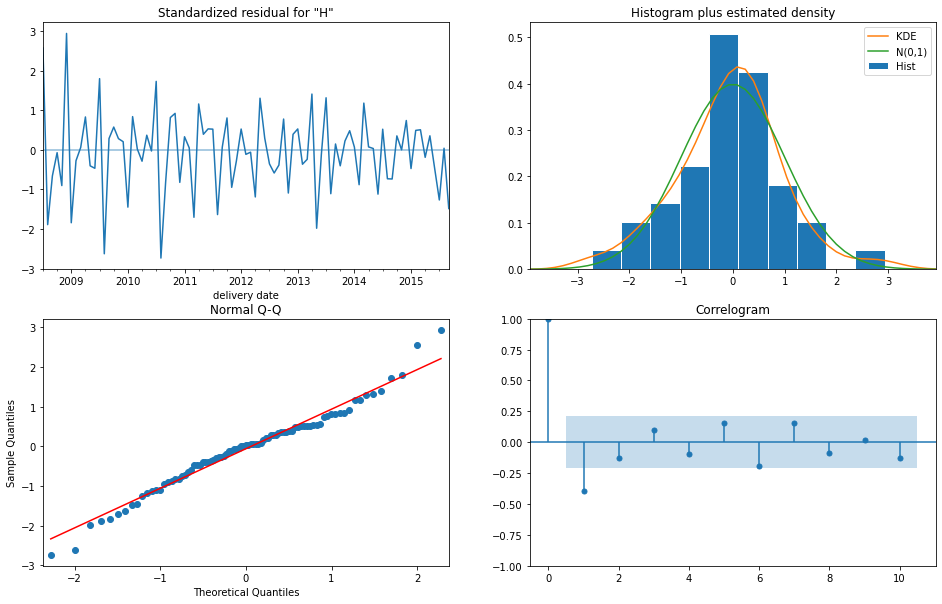

In [67]:
# Build SARIMAX model w/optimal parameters
sarimax = sm.tsa.statespace.SARIMAX(ts_df['HRDT'], 
                                    order=(0,1,1), 
                                    seasonal_order=(1,2,2,12), 
                                    freq='M')
                                    
# Fit the model
output = sarimax.fit()
    
# Print output summary
print(output.summary())

# Plot diagnostics
output.plot_diagnostics(figsize=(16,10));

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Mean Absolute Error: 2.122272535260954


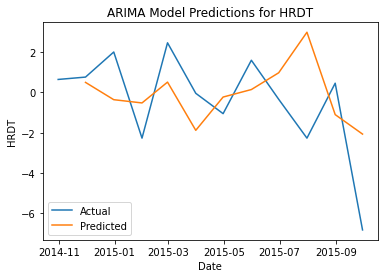

In [74]:
# Train-test split
train_data = ts_df.loc[:'09-2014']
test_data = ts_df.loc['10-2014':]

# SARIMA model
model = sm.tsa.statespace.SARIMAX(train_data['HRDT'], order=(0,1,1), seasonal_order=(1,2,2,12))
results = model.fit()

# Predictions
hrdt_pred = results.predict(start='11-2014', end='9-2015')

# Error
mae = pd.Series.abs(hrdt_pred - test_data['HRDT']).mean()
print('Mean Absolute Error:', mae)


plt.plot(test_data.index, test_data['HRDT'], label='Actual')
plt.plot(hrdt_pred.index, hrdt_pred, label='Predicted')

plt.title('ARIMA Model Predictions for HRDT')
plt.xlabel('Date')
plt.ylabel('HRDT')
plt.legend()

plt.show()

C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\beyza\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Mean Absolute Error: 32277.91160575597


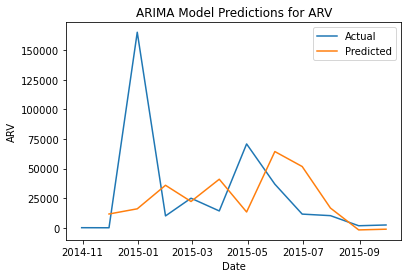

In [75]:
# Train-test split
train_data = ts_df.loc[:'09-2014']
test_data = ts_df.loc['10-2014':]

# SARIMA model
model = sm.tsa.statespace.SARIMAX(train_data['ARV'], order=(2,1,1), seasonal_order=(0,2,2,12))
results = model.fit()

# Predictions
arv_pred = results.predict(start='11-2014', end='9-2015')

# Error
mae = pd.Series.abs(arv_pred - test_data['ARV']).mean()
print('Mean Absolute Error:', mae)


plt.plot(test_data.index, test_data['ARV'], label='Actual')
plt.plot(arv_pred.index, arv_pred, label='Predicted')

plt.title('ARIMA Model Predictions for ARV')
plt.xlabel('Date')
plt.ylabel('ARV')
plt.legend()

plt.show()